In [1]:

import torch

import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm

import torch.optim as optim

import torchvision
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim
from PIL import Image



/Users/Lab/miniforge3/envs/tf/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/Lab/miniforge3/envs/tf/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowExxb
  Referenced from: /Users/Lab/miniforge3/envs/tf/lib/python3.9/site-packages/torchvision/image.so
  Expected in: /Users/Lab/miniforge3/envs/tf/lib/python3.9/site-packages/torch/lib/libc10.dylib
  warn(f"Failed to load image Python extension: {e}")


In [2]:
train_transform = A.Compose(
        [
            A.RandomCrop(width=256, height=256),
            A.Rotate(limit=35, p=1.0),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.1),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],
    )


In [5]:
import pandas as pd
df_3=pd.read_csv('/Users/Lab/Documents/RPE-1_10000_Flatfield_Corr_814/df_final_boolean.csv')
df_3

Unnamed: 0  Nuclei_ID  area  max_intensity_DAPI  max_intensity_Tub  \
0                0          1    90        17967.633889       14690.764372   
1                1          2   146        18736.947726       22299.115660   
2                2          3   103        14105.099552       22912.931139   
3                3          4   182        15386.235042       18129.965099   
4                4          5   103        11389.954928       17249.917232   
...            ...        ...   ...                 ...                ...   
260274         573        574   134        12306.583871       10876.528955   
260275         574        575    89        16535.905031        9025.968992   
260276         575        576    44        14466.607677       11597.247446   
260277         576        577    30        10093.007708       10668.544915   
260278         577        578    15        12327.292105        7701.545741   

        max_intensity_Edu  max_intensity_H3  mean_intensity_DAPI  \
0             5197.736679       4909.906725         12775.372181   
1              887.042388       4891.308835         12918.785545   
2              867.030490       4968.515023         10105.357488   
3              999.686844       5193.269456         11048.197181   
4             3531.245917       5145.504265          9031.524071   
...                   ...               ...                  ...   
260274       16848.359661       4517.158294          9530.608247   
260275         779.093592       4339.274111         12212.394861   
260276       17139.542846       4460.505515         10636.843211   
260277         923.535060       4164.569889          7471.221270   
260278        8148.203743       4223.098909          9584.392099   

        mean_intensity_Tub  mean_intensity_Edu  mean_intensity_H3  Cyto_ID  \
0              9432.533044         2000.730585        4580.963627      3.0   
1              9691.977412          725.241859        4531.214288      5.0   
2             12103.931707          722.389677        4547.658277      7.0   
3              9318.316876          777.938247        4671.004318      2.0   
4              9161.326933         2412.317588        4744.002380      1.0   
...                    ...                 ...                ...      ...   
260274         6769.695001        12131.974597        4195.591860    556.0   
260275         5891.828581          679.434922        4015.095613    550.0   
260276         7275.965598        12497.329783        4188.007664    551.0   
260277         7741.675359          783.467190        3928.172615    557.0   
260278         6206.812524         6071.585415        3997.477046    555.0   

        integrated_int_DAPI  Image_ID  DNA_content  
0              1.149783e+06    309419     0.980997  
1              1.886143e+06    309419     1.609260  
2              1.040852e+06    309419     0.888057  
3              2.010772e+06    309419     1.715594  
4              9.302470e+05    309419     0.793688  
...                     ...       ...          ...  
260274         1.277102e+06    310145     1.223323  
260275         1.086903e+06    310145     1.041134  
260276         4.680211e+05    310145     0.448313  
260277         2.241366e+05    310145     0.214698  
260278         1.437659e+05    310145     0.137712  

[260279 rows x 15 columns]

In [3]:
import pandas as pd
# df_1=pd.read_csv('/Users/haoranyue/Documents/master_project/df_aggregator_11_04.csv')
# df_2=pd.read_csv('/Users/haoranyue/Documents/master_project/df_aggregator_11_09.csv')
df=pd.read_csv('/Users/Lab/Documents/RPE-1_10000_Flatfield_Corr_814/df_final_boolean.csv')
# df=pd.concat([df_1,df_2])

# df=pd.read_csv('/Users/haoranyue/Documents/master_project/df_regression.csv')

In [4]:
df

Unnamed: 0  Nuclei_ID  area  max_intensity_DAPI  max_intensity_Tub  \
0                0          1    90        17967.633889       14690.764372   
1                1          2   146        18736.947726       22299.115660   
2                2          3   103        14105.099552       22912.931139   
3                3          4   182        15386.235042       18129.965099   
4                4          5   103        11389.954928       17249.917232   
...            ...        ...   ...                 ...                ...   
260274         573        574   134        12306.583871       10876.528955   
260275         574        575    89        16535.905031        9025.968992   
260276         575        576    44        14466.607677       11597.247446   
260277         576        577    30        10093.007708       10668.544915   
260278         577        578    15        12327.292105        7701.545741   

        max_intensity_Edu  max_intensity_H3  mean_intensity_DAPI  \
0             5197.736679       4909.906725         12775.372181   
1              887.042388       4891.308835         12918.785545   
2              867.030490       4968.515023         10105.357488   
3              999.686844       5193.269456         11048.197181   
4             3531.245917       5145.504265          9031.524071   
...                   ...               ...                  ...   
260274       16848.359661       4517.158294          9530.608247   
260275         779.093592       4339.274111         12212.394861   
260276       17139.542846       4460.505515         10636.843211   
260277         923.535060       4164.569889          7471.221270   
260278        8148.203743       4223.098909          9584.392099   

        mean_intensity_Tub  mean_intensity_Edu  mean_intensity_H3  Cyto_ID  \
0              9432.533044         2000.730585        4580.963627      3.0   
1              9691.977412          725.241859        4531.214288      5.0   
2             12103.931707          722.389677        4547.658277      7.0   
3              9318.316876          777.938247        4671.004318      2.0   
4              9161.326933         2412.317588        4744.002380      1.0   
...                    ...                 ...                ...      ...   
260274         6769.695001        12131.974597        4195.591860    556.0   
260275         5891.828581          679.434922        4015.095613    550.0   
260276         7275.965598        12497.329783        4188.007664    551.0   
260277         7741.675359          783.467190        3928.172615    557.0   
260278         6206.812524         6071.585415        3997.477046    555.0   

        integrated_int_DAPI  Image_ID  DNA_content  
0              1.149783e+06    309419     0.980997  
1              1.886143e+06    309419     1.609260  
2              1.040852e+06    309419     0.888057  
3              2.010772e+06    309419     1.715594  
4              9.302470e+05    309419     0.793688  
...                     ...       ...          ...  
260274         1.277102e+06    310145     1.223323  
260275         1.086903e+06    310145     1.041134  
260276         4.680211e+05    310145     0.448313  
260277         2.241366e+05    310145     0.214698  
260278         1.437659e+05    310145     0.137712  

[260279 rows x 15 columns]

In [5]:
df = df.drop('Unnamed: 0', axis=1)


In [24]:
# df = df.drop(['data','Nuclei_ID'], axis=1)
df.to_csv('/Users/haoranyue/Documents/master_project/df_regression.csv',index=False)

In [6]:
df['Cyto_ID'].astype('Int16')
df['data'] = df['Image_ID'].apply(str) + '_' + df['Cyto_ID'].astype('Int16').apply(str) + '.tif'

df

Nuclei_ID  area  max_intensity_DAPI  max_intensity_Tub  \
0               1    90        17967.633889       14690.764372   
1               2   146        18736.947726       22299.115660   
2               3   103        14105.099552       22912.931139   
3               4   182        15386.235042       18129.965099   
4               5   103        11389.954928       17249.917232   
...           ...   ...                 ...                ...   
260274        574   134        12306.583871       10876.528955   
260275        575    89        16535.905031        9025.968992   
260276        576    44        14466.607677       11597.247446   
260277        577    30        10093.007708       10668.544915   
260278        578    15        12327.292105        7701.545741   

        max_intensity_Edu  max_intensity_H3  mean_intensity_DAPI  \
0             5197.736679       4909.906725         12775.372181   
1              887.042388       4891.308835         12918.785545   
2              867.030490       4968.515023         10105.357488   
3              999.686844       5193.269456         11048.197181   
4             3531.245917       5145.504265          9031.524071   
...                   ...               ...                  ...   
260274       16848.359661       4517.158294          9530.608247   
260275         779.093592       4339.274111         12212.394861   
260276       17139.542846       4460.505515         10636.843211   
260277         923.535060       4164.569889          7471.221270   
260278        8148.203743       4223.098909          9584.392099   

        mean_intensity_Tub  mean_intensity_Edu  mean_intensity_H3  Cyto_ID  \
0              9432.533044         2000.730585        4580.963627      3.0   
1              9691.977412          725.241859        4531.214288      5.0   
2             12103.931707          722.389677        4547.658277      7.0   
3              9318.316876          777.938247        4671.004318      2.0   
4              9161.326933         2412.317588        4744.002380      1.0   
...                    ...                 ...                ...      ...   
260274         6769.695001        12131.974597        4195.591860    556.0   
260275         5891.828581          679.434922        4015.095613    550.0   
260276         7275.965598        12497.329783        4188.007664    551.0   
260277         7741.675359          783.467190        3928.172615    557.0   
260278         6206.812524         6071.585415        3997.477046    555.0   

        integrated_int_DAPI  Image_ID  DNA_content            data  
0              1.149783e+06    309419     0.980997    309419_3.tif  
1              1.886143e+06    309419     1.609260    309419_5.tif  
2              1.040852e+06    309419     0.888057    309419_7.tif  
3              2.010772e+06    309419     1.715594    309419_2.tif  
4              9.302470e+05    309419     0.793688    309419_1.tif  
...                     ...       ...          ...             ...  
260274         1.277102e+06    310145     1.223323  310145_556.tif  
260275         1.086903e+06    310145     1.041134  310145_550.tif  
260276         4.680211e+05    310145     0.448313  310145_551.tif  
260277         2.241366e+05    310145     0.214698  310145_557.tif  
260278         1.437659e+05    310145     0.137712  310145_555.tif  

[260279 rows x 15 columns]

In [7]:
df.drop(df[df['data'].duplicated(keep=False)].index,inplace=True)

In [8]:
df

Nuclei_ID  area  max_intensity_DAPI  max_intensity_Tub  \
0               1    90        17967.633889       14690.764372   
1               2   146        18736.947726       22299.115660   
2               3   103        14105.099552       22912.931139   
3               4   182        15386.235042       18129.965099   
4               5   103        11389.954928       17249.917232   
...           ...   ...                 ...                ...   
260274        574   134        12306.583871       10876.528955   
260275        575    89        16535.905031        9025.968992   
260276        576    44        14466.607677       11597.247446   
260277        577    30        10093.007708       10668.544915   
260278        578    15        12327.292105        7701.545741   

        max_intensity_Edu  max_intensity_H3  mean_intensity_DAPI  \
0             5197.736679       4909.906725         12775.372181   
1              887.042388       4891.308835         12918.785545   
2              867.030490       4968.515023         10105.357488   
3              999.686844       5193.269456         11048.197181   
4             3531.245917       5145.504265          9031.524071   
...                   ...               ...                  ...   
260274       16848.359661       4517.158294          9530.608247   
260275         779.093592       4339.274111         12212.394861   
260276       17139.542846       4460.505515         10636.843211   
260277         923.535060       4164.569889          7471.221270   
260278        8148.203743       4223.098909          9584.392099   

        mean_intensity_Tub  mean_intensity_Edu  mean_intensity_H3  Cyto_ID  \
0              9432.533044         2000.730585        4580.963627      3.0   
1              9691.977412          725.241859        4531.214288      5.0   
2             12103.931707          722.389677        4547.658277      7.0   
3              9318.316876          777.938247        4671.004318      2.0   
4              9161.326933         2412.317588        4744.002380      1.0   
...                    ...                 ...                ...      ...   
260274         6769.695001        12131.974597        4195.591860    556.0   
260275         5891.828581          679.434922        4015.095613    550.0   
260276         7275.965598        12497.329783        4188.007664    551.0   
260277         7741.675359          783.467190        3928.172615    557.0   
260278         6206.812524         6071.585415        3997.477046    555.0   

        integrated_int_DAPI  Image_ID  DNA_content            data  
0              1.149783e+06    309419     0.980997    309419_3.tif  
1              1.886143e+06    309419     1.609260    309419_5.tif  
2              1.040852e+06    309419     0.888057    309419_7.tif  
3              2.010772e+06    309419     1.715594    309419_2.tif  
4              9.302470e+05    309419     0.793688    309419_1.tif  
...                     ...       ...          ...             ...  
260274         1.277102e+06    310145     1.223323  310145_556.tif  
260275         1.086903e+06    310145     1.041134  310145_550.tif  
260276         4.680211e+05    310145     0.448313  310145_551.tif  
260277         2.241366e+05    310145     0.214698  310145_557.tif  
260278         1.437659e+05    310145     0.137712  310145_555.tif  

[228081 rows x 15 columns]

In [8]:
df_309394=df[(df['Image_ID']==308896)]
df_309394.loc[df_309394['Cyto_ID'].duplicated(keep=False)]

#(df['Cyto_ID'].duplicated(keep=False)==True)&

Empty DataFrame
Columns: [Nuclei_ID, area, max_intensity_DAPI, max_intensity_Tub, max_intensity_Edu, max_intensity_H3, mean_intensity_DAPI, mean_intensity_Tub, mean_intensity_Edu, mean_intensity_H3, Cyto_ID, integrated_int_DAPI, Image_ID, DNA_content]
Index: []

In [9]:
import os
list_dir=os.listdir('/Users/Lab/Documents/RPE-1_10000_Flatfield_Corr_814/boolean_mask_tubuliins/')
df_file=pd.DataFrame(list_dir,columns=['data'])

df_file

data
0       309636_275.tif
1       309743_242.tif
2       310311_457.tif
3        309147_49.tif
4        309637_87.tif
...                ...
226011  310145_396.tif
226012   310051_23.tif
226013  309205_186.tif
226014  309272_148.tif
226015  309286_149.tif

[226016 rows x 1 columns]

In [10]:
result = pd.merge(df_file, df, on="data",how='inner')
result

data  Nuclei_ID  area  max_intensity_DAPI  \
0       309636_275.tif        300   114        15103.232316   
1       309743_242.tif        252    82        19705.446263   
2       310311_457.tif        477   130        12737.244489   
3        309147_49.tif         51   151        14954.872076   
4        309637_87.tif         86    97        18656.822069   
...                ...        ...   ...                 ...   
213945  310145_396.tif        423   129        24088.814205   
213946   310051_23.tif         25   143        24336.184891   
213947  309205_186.tif        194   136        20638.779850   
213948  309272_148.tif        165   165        18270.461983   
213949  309286_149.tif        156   153        18754.564235   

        max_intensity_Tub  max_intensity_Edu  max_intensity_H3  \
0            20389.817476         810.856062       4580.242837   
1            11080.204385         777.190862       4138.058355   
2            12699.982054       10318.494368       4565.469099   
3            16278.980971       15519.372827       5289.210863   
4            21405.930707         817.403465       4731.294041   
...                   ...                ...               ...   
213945       17841.975671       37484.757513       5583.895829   
213946       13840.621280         891.456998       4471.281892   
213947       20245.236569       24533.821898       5351.174785   
213948       14833.140223       23762.191149       4844.322079   
213949       21076.217999         823.103169       4530.609215   

        mean_intensity_DAPI  mean_intensity_Tub  mean_intensity_Edu  \
0               9759.596106        10436.777337          700.856802   
1              12698.144688         6856.867024          705.714826   
2              10206.809650         7651.130633         6731.490317   
3              11857.322083         7934.986388        10677.025532   
4              11579.799098         9199.436014          725.185736   
...                     ...                 ...                 ...   
213945         17507.999205         8450.983044        12908.842022   
213946         14626.457637         8398.734261          710.115578   
213947         14668.627147         9557.828214        10829.927547   
213948         13382.887936         7658.108348        11530.157381   
213949         13443.091640        11354.676896          706.243795   

        mean_intensity_H3  Cyto_ID  integrated_int_DAPI  Image_ID  DNA_content  
0             4235.924527    275.0         1.112594e+06    309636     0.955941  
1             3897.586914    242.0         1.041248e+06    309743     0.974368  
2             4304.426706    457.0         1.326885e+06    310311     1.153216  
3             4746.337665     49.0         1.790456e+06    309147     1.409229  
4             4416.679235     87.0         1.123241e+06    309637     1.015935  
...                   ...      ...                  ...       ...          ...  
213945        4667.474471    396.0         2.258532e+06    310145     2.163425  
213946        4105.258123     23.0         2.091583e+06    310051     1.789404  
213947        4683.624053    186.0         1.994933e+06    309205     1.789378  
213948        4255.116444    148.0         2.208177e+06    309272     1.784289  
213949        4248.687543    149.0         2.056793e+06    309286     1.901283  

[213950 rows x 15 columns]

In [11]:
result[result['data'].duplicated(keep=False)].index

Int64Index([], dtype='int64')

In [11]:
result.drop(result[result['data'].duplicated(keep=False)].index,inplace=True)

In [11]:
result[result['data'].duplicated(keep=False)]

Empty DataFrame
Columns: [data, Nuclei_ID, area, max_intensity_DAPI, max_intensity_Tub, max_intensity_Edu, max_intensity_H3, mean_intensity_DAPI, mean_intensity_Tub, mean_intensity_Edu, mean_intensity_H3, Cyto_ID, integrated_int_DAPI, Image_ID, DNA_content]
Index: []

In [12]:
result

data  Nuclei_ID  area  max_intensity_DAPI  \
0       309636_275.tif        300   114        15103.232316   
1       309743_242.tif        252    82        19705.446263   
2       310311_457.tif        477   130        12737.244489   
3        309147_49.tif         51   151        14954.872076   
4        309637_87.tif         86    97        18656.822069   
...                ...        ...   ...                 ...   
213945  310145_396.tif        423   129        24088.814205   
213946   310051_23.tif         25   143        24336.184891   
213947  309205_186.tif        194   136        20638.779850   
213948  309272_148.tif        165   165        18270.461983   
213949  309286_149.tif        156   153        18754.564235   

        max_intensity_Tub  max_intensity_Edu  max_intensity_H3  \
0            20389.817476         810.856062       4580.242837   
1            11080.204385         777.190862       4138.058355   
2            12699.982054       10318.494368       4565.469099   
3            16278.980971       15519.372827       5289.210863   
4            21405.930707         817.403465       4731.294041   
...                   ...                ...               ...   
213945       17841.975671       37484.757513       5583.895829   
213946       13840.621280         891.456998       4471.281892   
213947       20245.236569       24533.821898       5351.174785   
213948       14833.140223       23762.191149       4844.322079   
213949       21076.217999         823.103169       4530.609215   

        mean_intensity_DAPI  mean_intensity_Tub  mean_intensity_Edu  \
0               9759.596106        10436.777337          700.856802   
1              12698.144688         6856.867024          705.714826   
2              10206.809650         7651.130633         6731.490317   
3              11857.322083         7934.986388        10677.025532   
4              11579.799098         9199.436014          725.185736   
...                     ...                 ...                 ...   
213945         17507.999205         8450.983044        12908.842022   
213946         14626.457637         8398.734261          710.115578   
213947         14668.627147         9557.828214        10829.927547   
213948         13382.887936         7658.108348        11530.157381   
213949         13443.091640        11354.676896          706.243795   

        mean_intensity_H3  Cyto_ID  integrated_int_DAPI  Image_ID  DNA_content  
0             4235.924527    275.0         1.112594e+06    309636     0.955941  
1             3897.586914    242.0         1.041248e+06    309743     0.974368  
2             4304.426706    457.0         1.326885e+06    310311     1.153216  
3             4746.337665     49.0         1.790456e+06    309147     1.409229  
4             4416.679235     87.0         1.123241e+06    309637     1.015935  
...                   ...      ...                  ...       ...          ...  
213945        4667.474471    396.0         2.258532e+06    310145     2.163425  
213946        4105.258123     23.0         2.091583e+06    310051     1.789404  
213947        4683.624053    186.0         1.994933e+06    309205     1.789378  
213948        4255.116444    148.0         2.208177e+06    309272     1.784289  
213949        4248.687543    149.0         2.056793e+06    309286     1.901283  

[213950 rows x 15 columns]

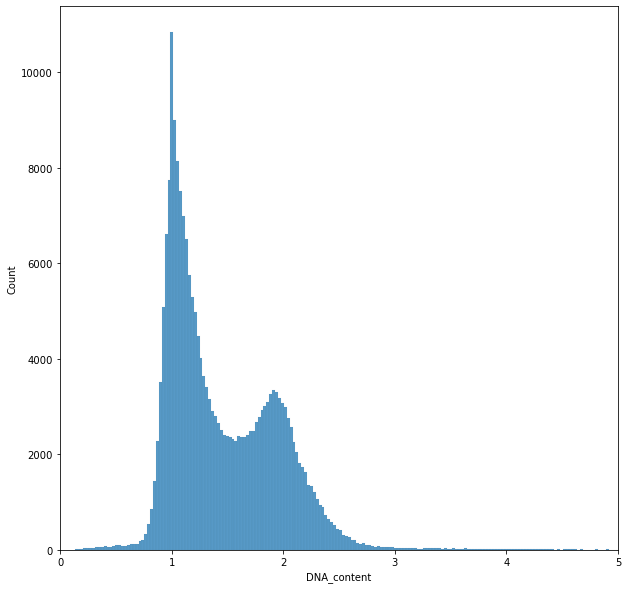

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.histplot(data=result,x=result['DNA_content'])
# [df['DNA_content']<1.6]
plt.xlim((0,5))
plt.show()

<Figure size 720x720 with 0 Axes>

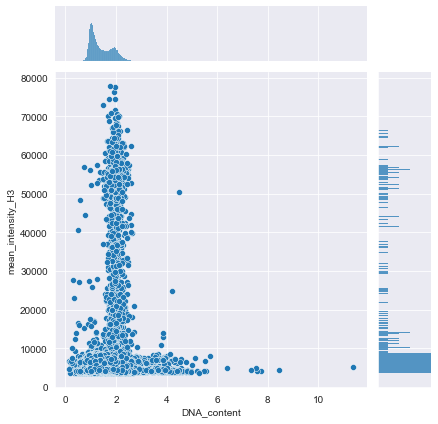

In [27]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.jointplot(data=result,x="DNA_content",y="mean_intensity_H3",)
# sns.kdeplot(data=df, x="DNA_content",bw_adjust=0.05,weights=0.05)
# [df['DNA_content']<1.6]
plt.xlim((0,5))
plt.show()

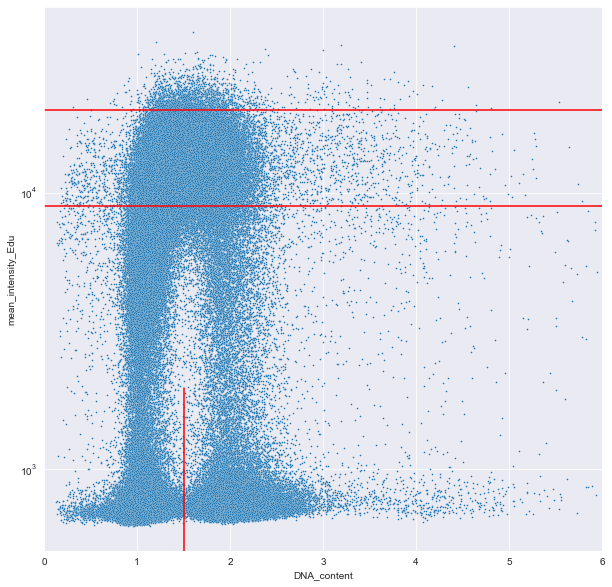

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.scatterplot(data=result, x='DNA_content', y="mean_intensity_Edu",s=3)
# sns.rugplot(data=df, x='DNA_content', y="mean_intensity_Edu", height=.1,lw=1, alpha=.005)
plt.yscale('log')
# plt.xscale('log')
plt.xlim((0,6))
plt.axhline(y=20000, color="red",)
plt.axhline(y=9000, color="red",)
plt.axvline(x=1.5,c='red',ymin = 0, ymax = 0.30)


In [15]:
df_M=result[(result['mean_intensity_H3']>9000)&(result['mean_intensity_Edu']<1000)]

df_g1=result[(result['mean_intensity_H3']<10000)&(result['mean_intensity_Edu']<1000)&(result['DNA_content']<1.25)&(result['DNA_content']>0.75)]

df_s=result[(result['mean_intensity_H3']<10000)&(result['mean_intensity_Edu']>10000)&(result['mean_intensity_Edu']<20000)]

df_g2=result[(result['mean_intensity_H3']<10000)&(result['mean_intensity_Edu']<1000)&(result['DNA_content']>1.75)&(result['DNA_content']<2.25)]


In [13]:
result.loc[ (result['mean_intensity_H3'] < 10000) & (result['mean_intensity_Edu'] < 1000) & (result['DNA_content'] < 1.3),'lable']=0
result.loc[(result['mean_intensity_H3'] < 10000) &(result['mean_intensity_Edu'] >10000) &(result['mean_intensity_Edu']<20000),'lable']=1
result.loc[(result['mean_intensity_Edu'] < 1000) & (result['DNA_content'] > 1.9)& (result['DNA_content']<2.1)&(result['mean_intensity_H3'] <10000),'lable']=2
result.loc[(result['mean_intensity_H3'] >9000)  & (result['mean_intensity_Edu'] < 1000),'lable']=3


In [14]:
result=result.dropna()

In [15]:
result=result.reset_index()
result

index            data  Nuclei_ID  area  max_intensity_DAPI  \
0            0  309743_242.tif        244    84        19705.446263   
1            1  310311_457.tif        474   144        11337.419877   
2            2   309147_49.tif         49   150        20827.917294   
3            3   309637_87.tif         93    98        16786.997036   
4            4   309977_86.tif         83   181        12480.040803   
...        ...             ...        ...   ...                 ...   
113045  169284  309284_299.tif        282    79        20285.035820   
113046  169285  309002_218.tif        218   130        11522.262467   
113047  169288  309083_107.tif        107   145        22140.205775   
113048  169289   310017_76.tif         84   147        20730.034559   
113049  169292  309286_149.tif        148   131        17233.625717   

        max_intensity_Tub  max_intensity_Edu  max_intensity_H3  \
0            11080.204385         777.190862       4138.058355   
1            15834.145702         765.655411       4226.339305   
2            24966.832316         894.025038      63431.267027   
3            11252.886482         845.822719       4904.111686   
4            17756.760646       19101.578118       4672.470011   
...                   ...                ...               ...   
113045       16000.561687         819.173298       4473.454045   
113046       12784.817610         860.022336       5247.414270   
113047       21510.191998         863.186406       4649.211598   
113048       18565.625659       23240.985778       5193.590203   
113049       17391.024445       19837.807951       4877.225918   

        mean_intensity_DAPI  mean_intensity_Tub  mean_intensity_Edu  \
0              12547.665834         6887.585958          704.922203   
1               8327.615833         7238.420406          670.622387   
2              15520.252820        15162.982678          769.202480   
3              12563.214430         6642.247778          732.089823   
4               9384.959002         6533.081672        12228.639096   
...                     ...                 ...                 ...   
113045         14476.816568         9264.485401          721.306877   
113046          8320.830042         7601.373255          710.793053   
113047         15219.243380        11075.798207          719.191404   
113048         12543.220410         7712.942165        12071.492982   
113049         12410.319292         7759.614861        12757.180171   

        mean_intensity_H3  Cyto_ID  integrated_int_DAPI  Image_ID  \
0             3897.356478    242.0         1.054004e+06    309743   
1             3950.584247    457.0         1.199177e+06    310311   
2            47685.097178     49.0         2.328038e+06    309147   
3             4557.883217     87.0         1.231195e+06    309637   
4             4326.838151     86.0         1.698678e+06    309977   
...                   ...      ...                  ...       ...   
113045        4212.190655    299.0         1.143669e+06    309284   
113046        4925.942922    218.0         1.081708e+06    309002   
113047        4332.702470    107.0         2.206790e+06    309083   
113048        4608.000678     76.0         1.843853e+06    310017   
113049        4421.236087    149.0         1.625752e+06    309286   

        DNA_content  lable  
0          0.971501    0.0  
1          1.048052    0.0  
2          1.862397    3.0  
3          1.094015    0.0  
4          1.545341    1.0  
...             ...    ...  
113045     1.043204    0.0  
113046     0.955228    0.0  
113047     2.050588    2.0  
113048     1.886587    1.0  
113049     1.309671    1.0  

[113050 rows x 17 columns]

In [16]:
import skimage
import os
import pandas as pd
img_max_intensity=[]
img_mean_intensity=[]
for img in result['data'].tolist():
    Path=os.path.join('/Users/haoranyue/Documents/master_project/output_16/',img)

    img_mean_intensity.append(skimage.io.imread(Path).mean())
    img_max_intensity.append(skimage.io.imread(Path).max())

df_mean=pd.DataFrame(img_mean_intensity,columns=['mean'])
df_max=pd.DataFrame(img_max_intensity,columns=['max'])


In [17]:
result['lable']

0         0.0
1         0.0
2         3.0
3         0.0
4         1.0
         ... 
113045    0.0
113046    0.0
113047    2.0
113048    1.0
113049    1.0
Name: lable, Length: 113050, dtype: float64

In [18]:
df_DAPI=pd.concat([result['area'],df_mean,df_max,result['lable']],axis=1)
df_DAPI
df_DAPI.to_csv('/Users/haoranyue/Documents/master_project/df_regression_11_29.csv',index=False)

In [22]:
result[['mean_intensity_DAPI','DNA_content','lable']].to_csv('/Users/haoranyue/Documents/master_project/df_regression_11_29.csv',index=False)

In [17]:
result.to_csv('/Users/haoranyue/Documents/master_project/df_regression.csv')

<Figure size 720x720 with 0 Axes>

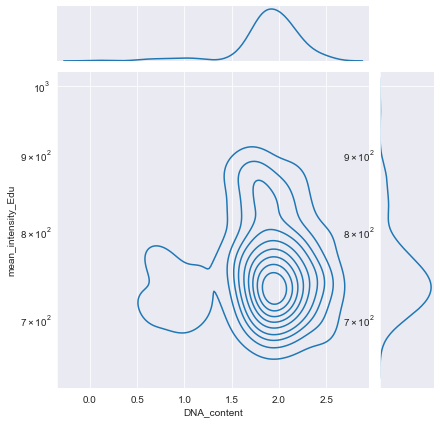

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.jointplot(y=df_M["mean_intensity_Edu"], x=df_M["DNA_content"], kind='kde')
plt.yscale('log')
plt.show()

In [26]:
df_s

data  Nuclei_ID  area  max_intensity_DAPI  \
3        309147_49.tif         51   151        14954.872076   
7       309690_421.tif        434   143        15329.749164   
11      309629_186.tif        193   142        18831.001692   
14       308994_34.tif         35   118        14053.379814   
15       309012_74.tif         74   129        14532.649994   
...                ...        ...   ...                 ...   
213936  310128_844.tif        861   135        16957.353578   
213940  309386_260.tif        267   130        19140.274387   
213945  310145_396.tif        423   129        24088.814205   
213947  309205_186.tif        194   136        20638.779850   
213948  309272_148.tif        165   165        18270.461983   

        max_intensity_Tub  max_intensity_Edu  max_intensity_H3  \
3            16278.980971       15519.372827       5289.210863   
7            12122.911159       16065.017661       4646.887446   
11           16841.368003       22192.549282       5036.193716   
14           21896.928595       19041.742975       5383.055371   
15           17708.971924       21541.893308       5143.410997   
...                   ...                ...               ...   
213936       10189.624249       21566.983090       4975.722580   
213940       26029.460993       16946.840769       4938.521509   
213945       17841.975671       37484.757513       5583.895829   
213947       20245.236569       24533.821898       5351.174785   
213948       14833.140223       23762.191149       4844.322079   

        mean_intensity_DAPI  mean_intensity_Tub  mean_intensity_Edu  \
3              11857.322083         7934.986388        10677.025532   
7              11250.061461         5766.379691        11278.662386   
11             13603.652670         9945.415842        10324.912907   
14              9715.843898        11579.485265        12127.565031   
15             10969.376751         8523.081071        15001.134399   
...                     ...                 ...                 ...   
213936         11941.427937         7206.208261        15735.907999   
213940         13616.765486        14497.013467        12014.719555   
213945         17507.999205         8450.983044        12908.842022   
213947         14668.627147         9557.828214        10829.927547   
213948         13382.887936         7658.108348        11530.157381   

        mean_intensity_H3  Cyto_ID  integrated_int_DAPI  Image_ID  DNA_content  
3             4746.337665     49.0         1.790456e+06    309147     1.409229  
7             4288.829683    421.0         1.608759e+06    309690     1.484086  
11            4554.713546    186.0         1.931719e+06    309629     1.694534  
14            4708.997457     34.0         1.146470e+06    308994     1.021244  
15            4700.892748     74.0         1.415050e+06    309012     1.376270  
...                   ...      ...                  ...       ...          ...  
213936        4612.348567    844.0         1.612093e+06    310128     1.418936  
213940        4579.647581    260.0         1.770180e+06    309386     1.567830  
213945        4667.474471    396.0         2.258532e+06    310145     2.163425  
213947        4683.624053    186.0         1.994933e+06    309205     1.789378  
213948        4255.116444    148.0         2.208177e+06    309272     1.784289  

[57863 rows x 15 columns]

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 644.076] [loc=1.024 scale=0.099]
[distfit] >[expon     ] [0.00 sec] [RSS: 7526.31] [loc=0.751 scale=0.274]
[distfit] >[pareto    ] [0.01 sec] [RSS: 7526.31] [loc=-16777215.249 scale=16777216.000]
[distfit] >[dweibull  ] [0.20 sec] [RSS: 837.768] [loc=1.026 scale=0.085]
[distfit] >[t         ] [1.83 sec] [RSS: 644.108] [loc=1.024 scale=0.099]
[distfit] >[genextreme] [0.72 sec] [RSS: 604.569] [loc=0.989 scale=0.097]
[distfit] >[gamma     ] [0.33 sec] [RSS: 590.117] [loc=-0.605 scale=0.006]
[distfit] >[lognorm   ] [0.52 sec] [RSS: 588.092] [loc=-1.291 scale=2.313]
[distfit] >[beta      ] [0.20 sec] [RSS: 672.086] [loc=0.701 scale=0.650]
[distfit] >[uniform   ] [0.00 sec] [RSS: 3855.88] [loc=0.751 scale=0.499]
[distfit] >[loggamma  ] [0.32 sec] [RSS: 657.046] [loc=-21.716 scale=3.255]
[distfit] >Compute confidence interval [parametric]
         distr        score  LLE              loc       scale  \
0      log

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nlognorm\nRSS(s=0.0425886, loc=-1.29052, scale=2.31276)'}, xlabel='Values', ylabel='Frequency'>)

<Figure size 360x360 with 0 Axes>

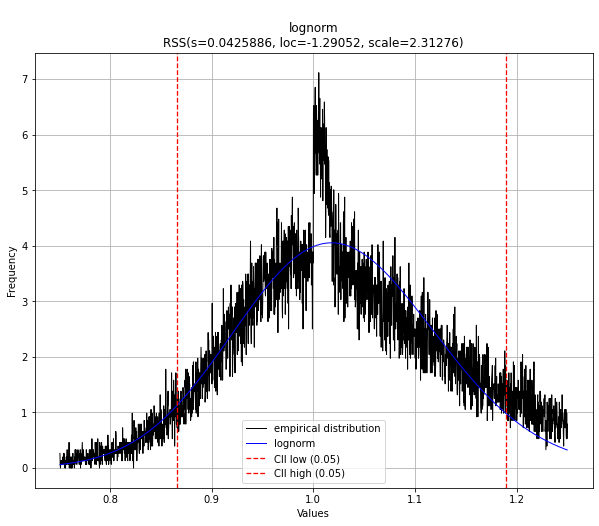

In [16]:
# distribution of g1 phase on DNA content
from distfit import distfit
plt.figure(figsize=(5,5))
# Generate 10000 normal distribution samples with mean 0, std dev of 3

# Initialize distfit
dist_m = distfit(bins=2000)

# Determine best-fitting probability distribution for data
dist_m.fit_transform((df_g1['DNA_content']))
# Print summary of evaluated distributions
print(dist_m.summary)
# Plot results
dist_m.plot()
# plt.xlim((0,3))

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 6.12209] [loc=1.526 scale=0.363]
[distfit] >[expon     ] [0.00 sec] [RSS: 100.204] [loc=0.179 scale=1.347]
[distfit] >[pareto    ] [0.02 sec] [RSS: 100.204] [loc=-117440511.821 scale=117440512.000]
[distfit] >[dweibull  ] [0.19 sec] [RSS: 4.40404] [loc=1.498 scale=0.270]
[distfit] >[t         ] [1.40 sec] [RSS: 3.74044] [loc=1.496 scale=0.264]
[distfit] >[genextreme] [0.63 sec] [RSS: 2.27929] [loc=1.375 scale=0.304]
[distfit] >[gamma     ] [0.33 sec] [RSS: 2.13981] [loc=0.014 scale=0.077]
[distfit] >[lognorm   ] [0.23 sec] [RSS: 1.61312] [loc=-0.294 scale=1.788]
[distfit] >[beta      ] [0.68 sec] [RSS: 2.25985] [loc=0.049 scale=1204954.964]
[distfit] >[uniform   ] [0.00 sec] [RSS: 108.129] [loc=0.179 scale=7.528]
[distfit] >[loggamma  ] [0.29 sec] [RSS: 7.17499] [loc=-121.919 scale=16.345]
[distfit] >Compute confidence interval [parametric]
         distr       score  LLE               loc           scale 

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nlognorm\nRSS(s=0.185321, loc=-0.293886, scale=1.78776)'}, xlabel='Values', ylabel='Frequency'>)

<Figure size 360x360 with 0 Axes>

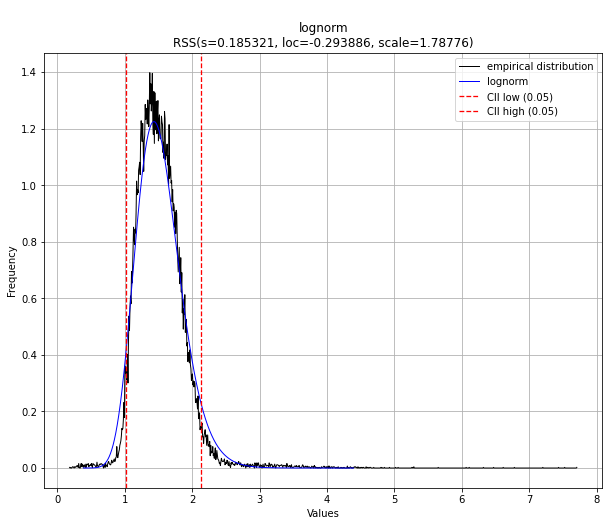

In [17]:
# distribution of S phase on DNA content
from distfit import distfit
plt.figure(figsize=(5,5))
# Generate 10000 normal distribution samples with mean 0, std dev of 3

# Initialize distfit
dist = distfit(bins=1000)

# Determine best-fitting probability distribution for data
dist.fit_transform(df_s['DNA_content'])
# Print summary of evaluated distributions
print(dist.summary)
# Plot results
dist.plot()



[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 317.47] [loc=1.999 scale=0.127]
[distfit] >[expon     ] [0.00 sec] [RSS: 1655.99] [loc=1.750 scale=0.249]
[distfit] >[pareto    ] [0.01 sec] [RSS: 1655.99] [loc=-33554430.250 scale=33554432.000]
[distfit] >[dweibull  ] [0.11 sec] [RSS: 428.193] [loc=1.999 scale=0.117]
[distfit] >[t         ] [0.72 sec] [RSS: 317.461] [loc=1.999 scale=0.127]
[distfit] >[genextreme] [0.40 sec] [RSS: 295.932] [loc=1.956 scale=0.127]
[distfit] >[gamma     ] [0.15 sec] [RSS: 312.056] [loc=-1.081 scale=0.005]
[distfit] >[lognorm   ] [0.43 sec] [RSS: 309.373] [loc=-0.461 scale=2.456]
[distfit] >[beta      ] [0.14 sec] [RSS: 193.85] [loc=1.749 scale=0.502]
[distfit] >[uniform   ] [0.00 sec] [RSS: 421.733] [loc=1.750 scale=0.500]
[distfit] >[loggamma  ] [0.14 sec] [RSS: 315.373] [loc=-19.552 scale=3.310]
[distfit] >Compute confidence interval [parametric]
         distr        score  LLE              loc       scale  \
0         be

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta\nRSS(a=1.38293, b=1.38683, loc=1.74929, scale=0.502164)'}, xlabel='Values', ylabel='Frequency'>)

<Figure size 360x360 with 0 Axes>

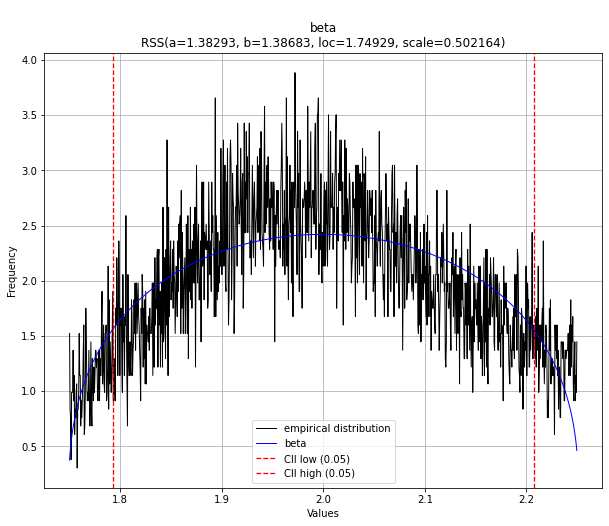

In [18]:
# distribution of g2 phase on DNA content
from distfit import distfit
plt.figure(figsize=(5,5))
# Generate 10000 normal distribution samples with mean 0, std dev of 3

# Initialize distfit
dist = distfit(bins=1000)

# Determine best-fitting probability distribution for data
dist.fit_transform(df_g2['DNA_content'])
# Print summary of evaluated distributions
print(dist.summary)
# Plot results
dist.plot()



[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 317.47] [loc=1.999 scale=0.127]
[distfit] >[expon     ] [0.00 sec] [RSS: 1655.99] [loc=1.750 scale=0.249]
[distfit] >[pareto    ] [0.01 sec] [RSS: 1655.99] [loc=-33554430.250 scale=33554432.000]
[distfit] >[dweibull  ] [0.11 sec] [RSS: 428.193] [loc=1.999 scale=0.117]
[distfit] >[t         ] [0.72 sec] [RSS: 317.461] [loc=1.999 scale=0.127]
[distfit] >[genextreme] [0.37 sec] [RSS: 295.932] [loc=1.956 scale=0.127]
[distfit] >[gamma     ] [0.15 sec] [RSS: 312.056] [loc=-1.081 scale=0.005]
[distfit] >[lognorm   ] [0.40 sec] [RSS: 309.373] [loc=-0.461 scale=2.456]
[distfit] >[beta      ] [0.10 sec] [RSS: 193.85] [loc=1.749 scale=0.502]
[distfit] >[uniform   ] [0.00 sec] [RSS: 421.733] [loc=1.750 scale=0.500]
[distfit] >[loggamma  ] [0.14 sec] [RSS: 315.373] [loc=-19.552 scale=3.310]
[distfit] >Compute confidence interval [parametric]
         distr        score  LLE              loc       scale  \
0         be

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta\nRSS(a=1.38293, b=1.38683, loc=1.74929, scale=0.502164)'}, xlabel='Values', ylabel='Frequency'>)

<Figure size 360x360 with 0 Axes>

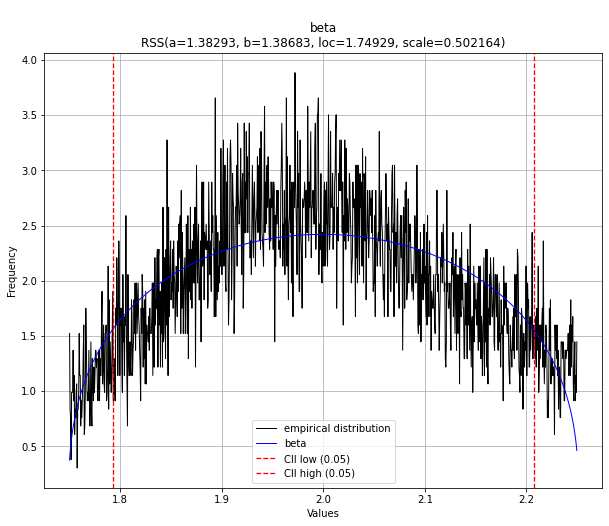

In [19]:

# distribution of g2 phase on DNA content
from distfit import distfit

plt.figure(figsize=(5, 5))
# Generate 10000 normal distribution samples with mean 0, std dev of 3

# Initialize distfit
dist = distfit(bins=1000)

# Determine best-fitting probability distribution for data
dist.fit_transform(df_g2['DNA_content'])
# Print summary of evaluated distributions
print(dist.summary)
# Plot results
dist.plot()


[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 1.41498] [loc=2.122 scale=0.493]
[distfit] >[expon     ] [0.00 sec] [RSS: 5.43773] [loc=0.357 scale=1.765]
[distfit] >[pareto    ] [0.00 sec] [RSS: 5.43773] [loc=-134217727.643 scale=134217728.000]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 0.315787] [loc=2.035 scale=0.270]
[distfit] >[t         ] [0.11 sec] [RSS: 0.203015] [loc=2.046 scale=0.218]
[distfit] >[genextreme] [0.07 sec] [RSS: 0.952841] [loc=1.936 scale=0.397]
[distfit] >[gamma     ] [0.04 sec] [RSS: 7.0522] [loc=0.357 scale=2.335]
[distfit] >[lognorm   ] [0.02 sec] [RSS: 0.818864] [loc=-0.231 scale=2.312]
[distfit] >[beta      ] [0.09 sec] [RSS: 1.00322] [loc=0.206 scale=1352455.969]
[distfit] >[uniform   ] [0.00 sec] [RSS: 5.558] [loc=0.357 scale=7.796]
[distfit] >[loggamma  ] [0.05 sec] [RSS: 1.55926] [loc=-191.514 scale=24.979]
[distfit] >Compute confidence interval [parametric]
         distr     score  LLE               loc           scale  

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nt\nRSS(df=2.27762, loc=2.04569, scale=0.218268)'}, xlabel='Values', ylabel='Frequency'>)

<Figure size 360x360 with 0 Axes>

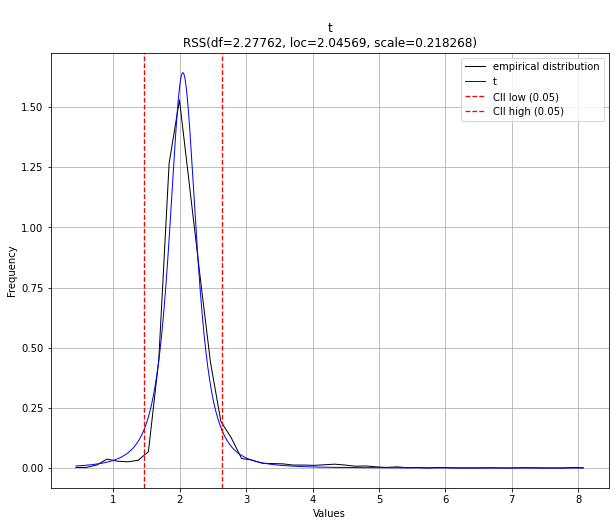

In [20]:
# distribution of M phase on DNA content
from distfit import distfit
plt.figure(figsize=(5,5))
# Generate 10000 normal distribution samples with mean 0, std dev of 3

# Initialize distfit
dist_g2 = distfit()

# Determine best-fitting probability distribution for data
dist_g2.fit_transform(df_M['DNA_content'])
# Print summary of evaluated distributions
print(dist_g2.summary)
# Plot results
dist_g2.plot()




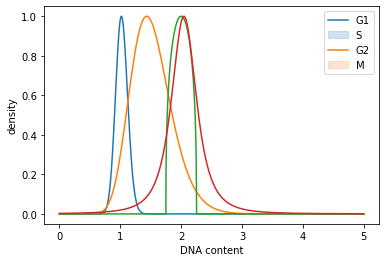

4.053964403064438


In [21]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
x = np.linspace (0, 5.0, 10000)

y_g1=stats.lognorm.pdf(x, s=0.0425886, loc=-1.29052, scale=2.31276)

y_s=stats.lognorm.pdf(x,s=0.185321, loc=-0.293886, scale=1.78776
)
y_g2=stats.beta.pdf(x,a=1.38293, b=1.38683, loc=1.74929, scale=0.502164
)
y_M=stats.t.pdf(x, df=2.27762, loc=2.04569, scale=0.218268)
sns.lineplot(x=x,y=y_g1/y_g1.max(),)
sns.lineplot(x=x,y=y_s/y_s.max(),)
sns.lineplot(x=x,y=y_g2/y_g2.max(),)
sns.lineplot(x=x,y=y_M/y_M.max())
plt.legend(labels=["G1","S","G2","M"])
plt.ylabel('density')
plt.xlabel('DNA content')
#display plot
plt.show()
print(y_g1.max())

In [39]:
df_g2

data  Nuclei_ID  area  max_intensity_DAPI  \
12       308802_42.tif         41   165        19425.905610   
40      310261_257.tif        251   182        19196.972822   
46      309527_244.tif        232   166        21339.744562   
47       309530_36.tif         35   173        20665.334273   
70      310429_248.tif        256   154        25387.341733   
...                ...        ...   ...                 ...   
169224  309405_208.tif        216   155        19738.090698   
169243   310064_98.tif         91   164        23940.361297   
169270  309664_439.tif        437   180        19873.017921   
169273   309320_67.tif         54   210        17599.340828   
169288  309083_107.tif        107   145        22140.205775   

        max_intensity_Tub  max_intensity_Edu  max_intensity_H3  \
12           21809.911391         871.493165       5007.802961   
40           16250.791398        1319.910545       4195.968973   
46           16948.187457         826.503068       4730.512888   
47           21659.106897        1037.407725       4901.213827   
70           18718.171591         765.082688       4532.361604   
...                   ...                ...               ...   
169224       15169.981719         909.519311       8087.322801   
169243       20354.919406         900.906201       5466.035514   
169270       16872.479741         861.681086       4276.188699   
169273       17394.708030         844.810228       5058.074084   
169288       21510.191998         863.186406       4649.211598   

        mean_intensity_DAPI  mean_intensity_Tub  mean_intensity_Edu  \
12             13067.045137        11019.189100          741.150466   
40             11767.178122        10143.286939          815.334125   
46             14531.505929         9499.160282          719.381383   
47             12719.953748         9036.426068          758.716573   
70             16067.643320         9544.249130          670.403961   
...                     ...                 ...                 ...   
169224         13002.404675         7539.734967          780.043687   
169243         13970.521809        13361.382640          759.537254   
169270         13233.681697         9690.389302          699.589196   
169273         12103.470028        10906.436828          719.997390   
169288         15219.243380        11075.798207          719.191404   

        mean_intensity_H3  Cyto_ID  integrated_int_DAPI  Image_ID  DNA_content  
12            4586.277662     42.0         2.156062e+06    308802     1.909496  
40            3927.745174    257.0         2.141626e+06    310261     2.153364  
46            4364.735657    244.0         2.412230e+06    309527     2.145152  
47            4581.422284     36.0         2.200552e+06    309530     1.993122  
70            3940.663004    248.0         2.474417e+06    310429     2.175261  
...                   ...      ...                  ...       ...          ...  
169224        7595.632063    208.0         2.015373e+06    309405     1.909188  
169243        4694.596288     98.0         2.291166e+06    310064     2.080767  
169270        3970.780389    439.0         2.382063e+06    309664     2.187572  
169273        4346.390924     67.0         2.541729e+06    309320     2.228881  
169288        4332.702470    107.0         2.206790e+06    309083     2.050588  

[21096 rows x 15 columns]

In [22]:
result['G1']=stats.gamma.pdf(result['DNA_content'], a=141.887, loc=-0.107412, scale=0.00794311)/y_g1.max()
result['S']=stats.gamma.pdf(result['DNA_content'],a=14.4715, loc=0.373794, scale=0.0776379)/y_s.max()
result['G2']=stats.beta.pdf(result['DNA_content'],a=1.41652, b=1.49751, loc=1.7489, scale=0.504636)/y_g2.max()
# result['M']=stats.t.cdf(result['DNA_content'], df=3.30722, loc=1.97351, scale=0.148031)/y_M.max()

In [23]:
result.loc[result['mean_intensity_H3']>9000,'M']=1

In [24]:
result['M'] = result['M'].replace(np.nan, 0)
result['M']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
213945    0.0
213946    0.0
213947    0.0
213948    0.0
213949    0.0
Name: M, Length: 213950, dtype: float64

In [27]:
result.loc[result['mean_intensity_H3']>9000,'G2']=0
result.loc[result['mean_intensity_H3']>9000,'G1']=0
result.loc[result['mean_intensity_H3']>9000,'S']=0


In [45]:
result.loc[result['mean_intensity_H3']>9000,'M']=1

In [28]:
result[result['mean_intensity_H3']>9000]

data  Nuclei_ID  area  max_intensity_DAPI  \
16       309275_43.tif         40   144        23987.885213   
27      310015_523.tif        534    82        51261.775730   
39      308943_386.tif        394   151        23031.737585   
90       309402_90.tif         90   190        20288.343959   
131     310326_108.tif        113   142        23347.328301   
...                ...        ...   ...                 ...   
213854  309669_368.tif        371   242        29343.595593   
213864  309499_134.tif        149   139        24162.183874   
213904  310332_521.tif        540   110        40878.950543   
213932  309940_634.tif        644   148        18820.473149   
213933   309147_50.tif         50   153        20827.917294   

        max_intensity_Tub  max_intensity_Edu  max_intensity_H3  \
16           20273.380944         898.789781      41215.171607   
27           32118.105404         902.699515      62214.140300   
39           15897.709835         799.587481      19471.357868   
90           19401.162485         934.234730      28345.663516   
131          15717.118092        1408.520735      20316.358856   
...                   ...                ...               ...   
213854       23807.197680        7718.052467      59014.667147   
213864       22996.767385         963.109317      34040.990584   
213904       21336.480481         862.479761      74180.034413   
213932       26444.346288         822.433305      56809.483655   
213933       24966.832316         894.025038      63431.267027   

        mean_intensity_DAPI  mean_intensity_Tub  mean_intensity_Edu  \
16             16702.059123        11700.189682          767.348491   
27             28244.628462        17642.834306          803.148515   
39             16007.671897        10196.107080          713.734336   
90             13030.116721        13046.997921          806.330099   
131            16296.898483        10206.761489          793.113271   
...                     ...                 ...                 ...   
213854         14435.869210        13716.493683         2752.762774   
213864         16274.436035        12439.915085          792.342167   
213904         24633.792265        12857.273159          753.916796   
213932         11344.061562        14719.590411          731.516745   
213933         15378.805559        15045.231452          769.423675   

        mean_intensity_H3  Cyto_ID  integrated_int_DAPI  Image_ID  \
16           24946.578980     43.0         2.405097e+06    309275   
27           56657.123248    523.0         2.316060e+06    310015   
39           10612.368080    386.0         2.417158e+06    308943   
90           18914.744371     90.0         2.475722e+06    309402   
131          10883.305900    108.0         2.314160e+06    310326   
...                   ...      ...                  ...       ...   
213854       30937.528529    368.0         3.493480e+06    309669   
213864       16271.008790    134.0         2.262147e+06    309499   
213904       56480.251515    521.0         2.709717e+06    310332   
213932       49597.149623    634.0         1.678921e+06    309940   
213933       47289.183354     50.0         2.352957e+06    309147   

        DNA_content   G1    S   G2    M  
16         2.369715  0.0  0.0  0.0  1.0  
27         2.092425  0.0  0.0  0.0  1.0  
39         2.171426  0.0  0.0  0.0  1.0  
90         2.347977  0.0  0.0  0.0  1.0  
131        2.094995  0.0  0.0  0.0  1.0  
...             ...  ...  ...  ...  ...  
213854     3.283318  0.0  0.0  0.0  1.0  
213864     1.806645  0.0  0.0  0.0  1.0  
213904     2.435658  0.0  0.0  0.0  1.0  
213932     1.544942  0.0  0.0  0.0  1.0  
213933     1.851961  0.0  0.0  0.0  1.0  

[5604 rows x 19 columns]

In [29]:
df_M=result[(result['mean_intensity_H3']>9000)]

df_g1=result[(result['mean_intensity_H3']<10000)&(result['mean_intensity_Edu']<1000)&(result['DNA_content']<1.05)&(result['DNA_content']>0.95)]

df_s=result[(result['mean_intensity_H3']<10000)&(result['mean_intensity_Edu']>10000)&(result['mean_intensity_Edu']<20000)]

df_g2=result[(result['mean_intensity_H3']<10000)&(result['mean_intensity_Edu']<1000)&(result['DNA_content']>1.95)&(result['DNA_content']<2.05)]


In [38]:
df_M

data  Nuclei_ID  area  max_intensity_DAPI  \
16       309275_43.tif         40   144        23987.885213   
27      310015_523.tif        534    82        51261.775730   
39      308943_386.tif        394   151        23031.737585   
90       309402_90.tif         90   190        20288.343959   
131     310326_108.tif        113   142        23347.328301   
...                ...        ...   ...                 ...   
213854  309669_368.tif        371   242        29343.595593   
213864  309499_134.tif        149   139        24162.183874   
213904  310332_521.tif        540   110        40878.950543   
213932  309940_634.tif        644   148        18820.473149   
213933   309147_50.tif         50   153        20827.917294   

        max_intensity_Tub  max_intensity_Edu  max_intensity_H3  \
16           20273.380944         898.789781      41215.171607   
27           32118.105404         902.699515      62214.140300   
39           15897.709835         799.587481      19471.357868   
90           19401.162485         934.234730      28345.663516   
131          15717.118092        1408.520735      20316.358856   
...                   ...                ...               ...   
213854       23807.197680        7718.052467      59014.667147   
213864       22996.767385         963.109317      34040.990584   
213904       21336.480481         862.479761      74180.034413   
213932       26444.346288         822.433305      56809.483655   
213933       24966.832316         894.025038      63431.267027   

        mean_intensity_DAPI  mean_intensity_Tub  mean_intensity_Edu  \
16             16702.059123        11700.189682          767.348491   
27             28244.628462        17642.834306          803.148515   
39             16007.671897        10196.107080          713.734336   
90             13030.116721        13046.997921          806.330099   
131            16296.898483        10206.761489          793.113271   
...                     ...                 ...                 ...   
213854         14435.869210        13716.493683         2752.762774   
213864         16274.436035        12439.915085          792.342167   
213904         24633.792265        12857.273159          753.916796   
213932         11344.061562        14719.590411          731.516745   
213933         15378.805559        15045.231452          769.423675   

        mean_intensity_H3  Cyto_ID  integrated_int_DAPI  Image_ID  \
16           24946.578980     43.0         2.405097e+06    309275   
27           56657.123248    523.0         2.316060e+06    310015   
39           10612.368080    386.0         2.417158e+06    308943   
90           18914.744371     90.0         2.475722e+06    309402   
131          10883.305900    108.0         2.314160e+06    310326   
...                   ...      ...                  ...       ...   
213854       30937.528529    368.0         3.493480e+06    309669   
213864       16271.008790    134.0         2.262147e+06    309499   
213904       56480.251515    521.0         2.709717e+06    310332   
213932       49597.149623    634.0         1.678921e+06    309940   
213933       47289.183354     50.0         2.352957e+06    309147   

        DNA_content   G1    S   G2    M  
16         2.369715  0.0  0.0  0.0  1.0  
27         2.092425  0.0  0.0  0.0  1.0  
39         2.171426  0.0  0.0  0.0  1.0  
90         2.347977  0.0  0.0  0.0  1.0  
131        2.094995  0.0  0.0  0.0  1.0  
...             ...  ...  ...  ...  ...  
213854     3.283318  0.0  0.0  0.0  1.0  
213864     1.806645  0.0  0.0  0.0  1.0  
213904     2.435658  0.0  0.0  0.0  1.0  
213932     1.544942  0.0  0.0  0.0  1.0  
213933     1.851961  0.0  0.0  0.0  1.0  

[5604 rows x 19 columns]

In [35]:
df_test=pd.concat([df_g1.iloc[-4145:-1],df_s.iloc[-7863:-1],df_g2.iloc[-1000:-1],df_M.iloc[-1000:-1]])
# df_test.loc[(df_test['mean_intensity_H3']>10000)&(df_test['mean_intensity_Edu']<1000),"M"]=1
# df_test.loc[(df_test['mean_intensity_H3']>10000)&(df_test['mean_intensity_Edu']<1000),"G1"]=0
# df_test.loc[(df_test['mean_intensity_H3']>10000)&(df_test['mean_intensity_Edu']<1000),"G2"]=0
# df_test.loc[(df_test['mean_intensity_H3']>10000)&(df_test['mean_intensity_Edu']<1000),"S"]=0

df_test[df_test['G2']>0]

data  Nuclei_ID  area  max_intensity_DAPI  \
134099  310410_562.tif        558   157        17430.650048   
134123  309692_470.tif        485   185        14833.600963   
134128  309614_288.tif        260   120        22981.039642   
134243  309755_637.tif        644   148        25314.455213   
134256   309332_89.tif         89   159        16224.595382   
...                ...        ...   ...                 ...   
168661   309743_45.tif         42   133        23833.594953   
168784  310322_509.tif        497   143        22401.907916   
168901   310325_40.tif         36   150        19063.119234   
169174  310430_130.tif        141   152        25196.278328   
169217  309499_134.tif        141   137        24162.183874   

        max_intensity_Tub  max_intensity_Edu  max_intensity_H3  \
134099       14046.138297       22037.855935       4697.772289   
134123       14952.872020       22274.021930       4590.914722   
134128       20402.867629       35917.747862       5166.026406   
134243       15726.100461       29814.112734       5532.570019   
134256       16979.565340       32591.143862       5043.209703   
...                   ...                ...               ...   
168661       25340.971893         877.895872      84300.022639   
168784       21438.817973         833.482661      58422.928491   
168901       24338.497101        1006.693565      67466.476342   
169174       26612.856606         829.973802      58832.848938   
169217       22996.767385         963.109317      34040.990584   

        mean_intensity_DAPI  mean_intensity_Tub  mean_intensity_Edu  \
134099         12321.041442         8483.027012        10502.121208   
134123         10609.162001         7076.517567        10034.929834   
134128         18034.610064         7910.053383        19380.006013   
134243         16597.176505         9401.176306        10192.032626   
134256         12408.063646         8634.734456        15559.501670   
...                     ...                 ...                 ...   
168661         16317.107386        16013.078264          755.273107   
168784         14405.991638        13446.561193          715.247933   
168901         13202.673558        12605.674696          798.502927   
169174         15249.463678        15107.455544          714.078703   
169217         16414.340587        12471.916417          792.516894   

        mean_intensity_H3  Cyto_ID  integrated_int_DAPI  Image_ID  \
134099        4200.334796    562.0         1.934404e+06    310410   
134123        4117.023477    470.0         1.962695e+06    309692   
134128        4484.271704    288.0         2.164153e+06    309614   
134243        4456.929495    637.0         2.456382e+06    309755   
134256        4431.475542     89.0         1.972882e+06    309332   
...                   ...      ...                  ...       ...   
168661       62229.240047     45.0         2.170175e+06    309743   
168784       51097.049146    509.0         2.060057e+06    310322   
168901       39131.517250     40.0         1.980401e+06    310325   
169174       54202.406142    130.0         2.317918e+06    310430   
169217       16248.265362    134.0         2.248765e+06    309499   

        DNA_content            G1         S        G2    M  
134099     1.784790  7.349985e-11  0.512252  0.601845  0.0  
134123     1.820293  1.154883e-11  0.453184  0.770676  0.0  
134128     1.785644  7.033979e-11  0.510794  0.607218  0.0  
134243     2.179813  7.396195e-21  0.087879  0.675173  0.0  
134256     1.764192  2.102769e-10  0.547858  0.430973  0.0  
...             ...           ...       ...       ...  ...  
168661     2.000302  4.816881e-16  0.216543  0.996701  1.0  
168784     1.811637  1.821529e-11  0.467282  0.737509  1.0  
168901     1.796221  4.072040e-11  0.492887  0.667061  1.0  
169174     2.093226  1.745359e-18  0.138291  0.905056  1.0  
169217     1.775626  1.175713e-10  0.527989  0.537444  1.0  

[2831 rows x 19 columns]

In [39]:

df_training=pd.concat([df_g1.head(20000),df_s.head(50000),df_g2.head(5873),df_M.head(4600)])
df_training.loc[(df_training['mean_intensity_H3']>10000)&(df_training['mean_intensity_Edu']<1000),"M"]=1
df_training.loc[(df_training['mean_intensity_H3']>10000)&(df_training['mean_intensity_Edu']<1000),"G1"]=0
df_training.loc[(df_training['mean_intensity_H3']>10000)&(df_training['mean_intensity_Edu']<1000),"G2"]=0
df_training.loc[(df_training['mean_intensity_H3']>10000)&(df_training['mean_intensity_Edu']<1000),"S"]=0


In [40]:
df_training

data  Nuclei_ID  area  max_intensity_DAPI  \
0       309636_275.tif        300   114        15103.232316   
1       309743_242.tif        252    82        19705.446263   
4        309637_87.tif         86    97        18656.822069   
21      309979_286.tif        295   134        12350.749841   
23      309002_201.tif        217   147        10319.172795   
...                ...        ...   ...                 ...   
175043   308795_88.tif         86    98        36666.871825   
175068  310124_332.tif        355   119        25722.175911   
175102  308835_287.tif        304   178        22178.956533   
175121  310062_518.tif        516    91        40669.176998   
175252  310410_164.tif        169    78        54595.820924   

        max_intensity_Tub  max_intensity_Edu  max_intensity_H3  \
0            20389.817476         810.856062       4580.242837   
1            11080.204385         777.190862       4138.058355   
4            21405.930707         817.403465       4731.294041   
21            8926.186164         739.187235       4015.448294   
23           14212.064518         808.817054       5226.473855   
...                   ...                ...               ...   
175043       36567.996224        1195.653079      75806.628327   
175068       15259.314923         906.624421      38499.727856   
175102       27781.347256         826.507537      59502.823890   
175121       25578.308834         860.172663      57039.981103   
175252       17895.893808         963.065831      66071.535064   

        mean_intensity_DAPI  mean_intensity_Tub  mean_intensity_Edu  \
0               9759.596106        10436.777337          700.856802   
1              12698.144688         6856.867024          705.714826   
4              11579.799098         9199.436014          725.185736   
21              8318.965859         4831.682165          648.039109   
23              7421.063169         7575.750562          703.454261   
...                     ...                 ...                 ...   
175043         21858.426175        21075.689958          876.397931   
175068         17988.243529         8758.139879          749.355077   
175102         13976.253658        16877.776197          716.979427   
175121         21198.949764        14571.735756          752.733357   
175252         28779.334513        13371.119704          850.964749   

        mean_intensity_H3  Cyto_ID  integrated_int_DAPI  Image_ID  \
0             4235.924527    275.0         1.112594e+06    309636   
1             3897.586914    242.0         1.041248e+06    309743   
4             4416.679235     87.0         1.123241e+06    309637   
21            3762.476449    286.0         1.114741e+06    309979   
23            4871.376027    201.0         1.090896e+06    309002   
...                   ...      ...                  ...       ...   
175043       57509.170624     88.0         2.142126e+06    308795   
175068       24315.716916    332.0         2.140601e+06    310124   
175102       50209.902083    287.0         2.487773e+06    308835   
175121       50889.041910    518.0         1.929104e+06    310062   
175252       53085.206555    164.0         2.244788e+06    310410   

        DNA_content        G1         S   G2    M  
0          0.955941  0.870693  0.166551  0.0  0.0  
1          0.974368  0.962903  0.199889  0.0  0.0  
4          1.015935  1.042086  0.288275  0.0  0.0  
21         1.000517  1.035830  0.253432  0.0  0.0  
23         0.957257  0.878190  0.168809  0.0  0.0  
...             ...       ...       ...  ...  ...  
175043     2.080566  0.000000  0.000000  0.0  1.0  
175068     1.973721  0.000000  0.000000  0.0  1.0  
175102     2.335346  0.000000  0.000000  0.0  1.0  
175121     1.720005  0.000000  0.000000  0.0  1.0  
175252     1.967217  0.000000  0.000000  0.0  1.0  

[80473 rows x 19 columns]

In [23]:
result.loc[(result['mean_intensity_H3']<10000)&(result['mean_intensity_Edu']<1000)&(result['DNA_content']<1.05)&(result['DNA_content']>0.95),'G1']=1
result.loc[(result['mean_intensity_H3']<10000)&(result['mean_intensity_Edu']>10000)&(result['mean_intensity_Edu']<20000),'S']=1
result.loc[(result['mean_intensity_H3']<10000)&(result['mean_intensity_Edu']<1000)&(result['DNA_content']>1.95)&(result['DNA_content']<2.05),'G2']=1
result.loc[(result['mean_intensity_H3']>10000)&(result['mean_intensity_Edu']<1000),'M']=1

In [16]:
df_all=result.dropna(axis=0)

In [178]:
df_all[['data','Label']].to_csv('/Users/haoranyue/Documents/master_project/df_label_11_09_02.csv',index=False)

In [37]:
df_1=df_all[df_all['Label']==0].head(5000)
df_2=df_all[df_all['Label']==1].head(5000)
df_3=df_all[df_all['Label']==2].head(5000)
df_4=df_all[df_all['Label']==3]
df_all_2=pd.concat([df_1,df_2,df_3,df_4])
df_all_2[['data','Label']].to_csv('/Users/haoranyue/Documents/master_project/df_label_11_06_2.csv',index=False)

In [24]:
df_all=pd.read_csv('/Users/haoranyue/Documents/master_project/df_label_11_03.csv')
df_all['Label'].dropna()

1        0.0
2        0.0
3        1.0
4        1.0
5        0.0
        ... 
27499    1.0
27500    2.0
27501    1.0
27502    1.0
27503    0.0
Name: Label, Length: 21418, dtype: float64

In [41]:
result=df_training

In [42]:
import numpy as np
result=result.replace(np.nan,0)
result['all']=result['G1']+result['S']+result['G2']+result['M']
result.drop(result[result['all']==0].index,inplace=True)


In [43]:
result

data  Nuclei_ID  area  max_intensity_DAPI  \
0       309636_275.tif        300   114        15103.232316   
1       309743_242.tif        252    82        19705.446263   
4        309637_87.tif         86    97        18656.822069   
21      309979_286.tif        295   134        12350.749841   
23      309002_201.tif        217   147        10319.172795   
...                ...        ...   ...                 ...   
175043   308795_88.tif         86    98        36666.871825   
175068  310124_332.tif        355   119        25722.175911   
175102  308835_287.tif        304   178        22178.956533   
175121  310062_518.tif        516    91        40669.176998   
175252  310410_164.tif        169    78        54595.820924   

        max_intensity_Tub  max_intensity_Edu  max_intensity_H3  \
0            20389.817476         810.856062       4580.242837   
1            11080.204385         777.190862       4138.058355   
4            21405.930707         817.403465       4731.294041   
21            8926.186164         739.187235       4015.448294   
23           14212.064518         808.817054       5226.473855   
...                   ...                ...               ...   
175043       36567.996224        1195.653079      75806.628327   
175068       15259.314923         906.624421      38499.727856   
175102       27781.347256         826.507537      59502.823890   
175121       25578.308834         860.172663      57039.981103   
175252       17895.893808         963.065831      66071.535064   

        mean_intensity_DAPI  mean_intensity_Tub  mean_intensity_Edu  \
0               9759.596106        10436.777337          700.856802   
1              12698.144688         6856.867024          705.714826   
4              11579.799098         9199.436014          725.185736   
21              8318.965859         4831.682165          648.039109   
23              7421.063169         7575.750562          703.454261   
...                     ...                 ...                 ...   
175043         21858.426175        21075.689958          876.397931   
175068         17988.243529         8758.139879          749.355077   
175102         13976.253658        16877.776197          716.979427   
175121         21198.949764        14571.735756          752.733357   
175252         28779.334513        13371.119704          850.964749   

        mean_intensity_H3  Cyto_ID  integrated_int_DAPI  Image_ID  \
0             4235.924527    275.0         1.112594e+06    309636   
1             3897.586914    242.0         1.041248e+06    309743   
4             4416.679235     87.0         1.123241e+06    309637   
21            3762.476449    286.0         1.114741e+06    309979   
23            4871.376027    201.0         1.090896e+06    309002   
...                   ...      ...                  ...       ...   
175043       57509.170624     88.0         2.142126e+06    308795   
175068       24315.716916    332.0         2.140601e+06    310124   
175102       50209.902083    287.0         2.487773e+06    308835   
175121       50889.041910    518.0         1.929104e+06    310062   
175252       53085.206555    164.0         2.244788e+06    310410   

        DNA_content        G1         S   G2    M       all  
0          0.955941  0.870693  0.166551  0.0  0.0  1.037244  
1          0.974368  0.962903  0.199889  0.0  0.0  1.162792  
4          1.015935  1.042086  0.288275  0.0  0.0  1.330361  
21         1.000517  1.035830  0.253432  0.0  0.0  1.289262  
23         0.957257  0.878190  0.168809  0.0  0.0  1.047000  
...             ...       ...       ...  ...  ...       ...  
175043     2.080566  0.000000  0.000000  0.0  1.0  1.000000  
175068     1.973721  0.000000  0.000000  0.0  1.0  1.000000  
175102     2.335346  0.000000  0.000000  0.0  1.0  1.000000  
175121     1.720005  0.000000  0.000000  0.0  1.0  1.000000  
175252     1.967217  0.000000  0.000000  0.0  1.0  1.000000  

[80473 rows x 20 columns]

In [19]:
result.drop(result[result['all']==2].index,inplace=True)

In [44]:
result.drop(columns=['all'],inplace=True)


In [45]:
result.columns[-4:]

Index(['G1', 'S', 'G2', 'M'], dtype='object')

In [46]:
result['target'] = result[result.columns[-4:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
result['target'].apply(str)

0         0.8706925232828302,0.16655124669336385,0.0,0.0
1         0.9629027028066037,0.19988903891875556,0.0,0.0
4         1.0420862865705305,0.28827483127815806,0.0,0.0
21        1.0358302824973609,0.25343212287236844,0.0,0.0
23          0.878190151852874,0.1688094630478975,0.0,0.0
                               ...                      
175043                                   0.0,0.0,0.0,1.0
175068                                   0.0,0.0,0.0,1.0
175102                                   0.0,0.0,0.0,1.0
175121                                   0.0,0.0,0.0,1.0
175252                                   0.0,0.0,0.0,1.0
Name: target, Length: 80473, dtype: object

In [48]:
result['Cyto_ID'].astype('Int16')
result['data'] = result['Image_ID'].apply(str) + '_' + result['Cyto_ID'].astype('Int16').apply(
    str) + '.tif'

df_all_phase_training = result[['data', 'target']]
df_all_phase_training['target'] = '[' + df_all_phase_training['target'].apply(str) + ']'

df_all_phase_training.to_csv('/Users/Lab/Documents/RPE-1_10000_Flatfield_Corr_814/df_training.csv', index=False,)
df_all_phase_training

data                                            target
0       309636_275.tif  [0.8706925232828302,0.16655124669336385,0.0,0.0]
1       309743_242.tif  [0.9629027028066037,0.19988903891875556,0.0,0.0]
4        309637_87.tif  [1.0420862865705305,0.28827483127815806,0.0,0.0]
21      309979_286.tif  [1.0358302824973609,0.25343212287236844,0.0,0.0]
23      309002_201.tif    [0.878190151852874,0.1688094630478975,0.0,0.0]
...                ...                                               ...
175043   308795_88.tif                                 [0.0,0.0,0.0,1.0]
175068  310124_332.tif                                 [0.0,0.0,0.0,1.0]
175102  308835_287.tif                                 [0.0,0.0,0.0,1.0]
175121  310062_518.tif                                 [0.0,0.0,0.0,1.0]
175252  310410_164.tif                                 [0.0,0.0,0.0,1.0]

[80473 rows x 2 columns]

In [59]:
df_all_phase_training['target'].softmax(dim=1)

AttributeError: 'Series' object has no attribute 'softmax'

In [27]:
df_g1=df_all_phase_training[df_all_phase_training['target']=='[1.0,0.0,0.0,0.0]']
df_s=df_all_phase_training[df_all_phase_training['target']=='[0.0,1.0,0.0,0.0]']
df_g2=df_all_phase_training[df_all_phase_training['target']=='[0.0,0.0,1.0,0.0]']
df_m=df_all_phase_training[df_all_phase_training['target']=='[0.0,0.0,0.0,1.0]']
# pd_all_phase=pd.concat([df_g1,df_s,df_g2,df_m])
# pd_all_phase.to_csv('/Users/haoranyue/Documents/master_project/df_check_11_15_02.csv', index=False,)
# pd_all_phase[pd_all_phase['target']=='[0.0,0.0,0.0,1.0]']
df_m

data             target
0       309147_49.tif  [0.0,0.0,0.0,1.0]
101     309206_91.tif  [0.0,0.0,0.0,1.0]
405    309129_337.tif  [0.0,0.0,0.0,1.0]
518     308798_15.tif  [0.0,0.0,0.0,1.0]
919      309478_1.tif  [0.0,0.0,0.0,1.0]
...               ...                ...
42965  308792_137.tif  [0.0,0.0,0.0,1.0]
43081  309256_305.tif  [0.0,0.0,0.0,1.0]
43293   309473_62.tif  [0.0,0.0,0.0,1.0]
43448   308838_72.tif  [0.0,0.0,0.0,1.0]
43502  309012_152.tif  [0.0,0.0,0.0,1.0]

[253 rows x 2 columns]

In [22]:
import skimage
for i in list_path:
    image1=skimage.io.imread('/Users/haoranyue/Documents/master_project/output_18/'+i)
    if image1.shape[0]!=91:
        print(i)

308947_8.tif
308943_22.tif
309278_456.tif
308943_437.tif
309628_342.tif
308946_228.tif
308949_7.tif
309223_13.tif
309276_12.tif
309634_15.tif
309279_309.tif
308928_6.tif
309316_7.tif
309277_3.tif
308927_17.tif
309273_22.tif
309311_282.tif
309465_4.tif
308892_231.tif
308950_6.tif
309468_323.tif
309282_18.tif
308889_2.tif
309271_5.tif
309640_335.tif
308924_228.tif
308945_260.tif
308896_5.tif
309636_315.tif
309320_203.tif
308931_7.tif
309628_10.tif
309273_7.tif
309312_3.tif
309323_316.tif
309273_6.tif
309642_3.tif
309628_11.tif
309280_9.tif
309638_28.tif
309325_9.tif
309636_11.tif
309271_4.tif
309271_332.tif
309638_14.tif
309640_1.tif
308889_3.tif
309280_262.tif
309271_326.tif
308950_7.tif
309465_5.tif
309311_283.tif
309273_23.tif
308927_16.tif
309277_2.tif
309279_308.tif
309279_320.tif
309633_21.tif
309319_246.tif
308944_310.tif
309470_9.tif
309472_12.tif
309637_503.tif
309312_26.tif
309314_4.tif
308946_229.tif
309638_357.tif
309627_6.tif
309318_257.tif
309278_443.tif
308932_318.tif
3092

In [25]:
df_all_phase_training[df_all_phase_training['data']=='308947_8.tif']

data             target
57  308947_8.tif  [1.0,0.0,0.0,0.0]

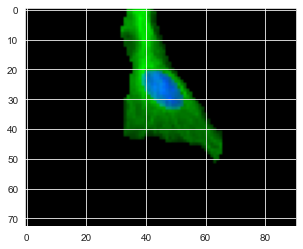

In [26]:
import skimage
img1=skimage.io.imread('/Users/haoranyue/Documents/master_project/output_18/308947_8.tif')
import matplotlib.pyplot as plt
plt.imshow(img1)

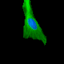

In [35]:
from PIL import Image
Image.fromarray(img1).resize((64,64))


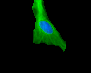

In [36]:
Image.fromarray(img1)

In [30]:

df_all_phase_training.loc[df_all_phase_training['data'].duplicated(keep=False)]

Empty DataFrame
Columns: [data, target]
Index: []

In [18]:
df.loc[(df['mean_intensity_H3']<10000)&(df['mean_intensity_Edu']<1000)&(df['DNA_content']<1.5),'G1']=1
df.loc[(df['mean_intensity_H3']<10000)&(df['mean_intensity_Edu']<20000)&(df['mean_intensity_Edu']>9000),'S']=1
df.loc[(df['mean_intensity_H3']<10000)&(df['mean_intensity_Edu']<1000)&(df['DNA_content']>1.5),'G2']=1
df.loc[(df['mean_intensity_H3']>40000)&(df['mean_intensity_Edu']<1000),'M']=1


In [24]:
df_g1_phase=df[df['G1']==1]
df_s_phase=df[df['S']==1]
df_g2_phase=df[df['G2']==1]
df_m_phase=df[df['M']==1]
df_all_phase=pd.concat([df_g1_phase,df_s_phase,df_g2_phase,df_m_phase])
df_all_phase=df_all_phase.replace(np.nan,0)

In [27]:

df_all_phase['target'] = df_all_phase[df_all_phase.columns[-4:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df_all_phase['target'].apply(str)

1        1.0,0.0,0.0,0.0
2        1.0,0.0,0.0,0.0
12       1.0,0.0,0.0,0.0
17       1.0,0.0,0.0,0.0
18       1.0,0.0,0.0,0.0
              ...       
30781    0.0,0.0,0.0,1.0
31291    0.0,0.0,0.0,1.0
31515    0.0,0.0,0.0,1.0
31523    0.0,0.0,0.0,1.0
31637    0.0,0.0,0.0,1.0
Name: target, Length: 24636, dtype: object

In [ ]:
df_all_phase['Cyto_ID'].astype('Int16')

In [28]:
df_all_phase['data'] = df_all_phase['Image_ID'].apply(str) + '_' + df_all_phase['Cyto_ID'].astype('Int16').apply(str) + '.tif'

df_all_phase_training = df_all_phase[['data', 'target']]
df_all_phase_training['target'] = '[' + df_all_phase_training['target'].apply(str) + ']'
df_all_phase_training

data             target
1        308888_2.tif  [1.0,0.0,0.0,0.0]
2        308888_3.tif  [1.0,0.0,0.0,0.0]
12      308888_13.tif  [1.0,0.0,0.0,0.0]
17      308888_15.tif  [1.0,0.0,0.0,0.0]
18      308888_18.tif  [1.0,0.0,0.0,0.0]
...               ...                ...
30781   308870_60.tif  [0.0,0.0,0.0,1.0]
31291  308872_166.tif  [0.0,0.0,0.0,1.0]
31515  308873_156.tif  [0.0,0.0,0.0,1.0]
31523  308873_162.tif  [0.0,0.0,0.0,1.0]
31637  308873_262.tif  [0.0,0.0,0.0,1.0]

[24636 rows x 2 columns]

In [32]:
df_all_phase_training.to_csv('/Users/haoranyue/Documents/master_project/df_check_10_18.csv',index=False,header=False)

In [612]:
df.loc[df['G1']>1,'G1']=1
df.loc[df['S']>1,'S']=1
df.loc[df['G2']>1,'G2']=1
df.loc[df['M']>1,'M']=1

In [613]:
df

Nuclei_ID  area  max_intensity_DAPI  max_intensity_Tub  \
0              1   124              8498.0             9987.0   
1              2    89             13990.0            11951.0   
2              3   173             11015.0             9362.0   
3              4   130             10633.0            13507.0   
4              5    66             10426.0            11745.0   
...          ...   ...                 ...                ...   
31821        170    90             17053.0            22551.0   
31822        171   122             15804.0            22562.0   
31823        172   139             13950.0            17948.0   
31824        173   109             15841.0            18894.0   
31825        174    72             21832.0            16314.0   

       max_intensity_Edu  max_intensity_H3  mean_intensity_DAPI  \
0                11163.0            2386.0          6163.612903   
1                  714.0            3358.0          9430.146067   
2                  598.0            2711.0          7380.763006   
3                15057.0            3715.0          8003.415385   
4                10910.0            3840.0          7629.454545   
...                  ...               ...                  ...   
31821              845.0            4656.0         12285.400000   
31822            22634.0            5687.0         11512.909836   
31823            19456.0            4991.0         10990.640288   
31824              798.0            4539.0         11140.110092   
31825            41574.0            5702.0         15934.944444   

       mean_intensity_Tub  mean_intensity_Edu  mean_intensity_H3  Cyto_ID  \
0             5224.758065         7531.790323        2131.556452      1.0   
1             6744.179775          642.674157        3175.067416      2.0   
2             4899.092486          510.780347        2481.491329      3.0   
3             7204.846154         9602.676923        3373.307692      4.0   
4             6736.924242         7371.545455        3537.409091      5.0   
...                   ...                 ...                ...      ...   
31821        11139.222222          729.711111        4379.344444    160.0   
31822        11161.868852        12359.557377        4993.754098    159.0   
31823         9944.676259        14146.920863        4615.316547    161.0   
31824         9569.165138          720.596330        4277.064220    162.0   
31825         8583.791667        22551.708333        4921.236111    163.0   

       integrated_int_DAPI  Image_ID  DNA_content        G1         S  \
0                 764288.0    308888     0.590596  0.332431  0.116810   
1                 839283.0    308888     0.648548  1.000000  0.139502   
2                1276872.0    308888     0.986691  1.000000  0.413440   
3                1040444.0    308888     0.803993  1.000000  1.000000   
4                 503544.0    308888     0.389109  0.109042  0.065269   
...                    ...       ...          ...       ...       ...   
31821            1105686.0    308874     0.901324  1.000000  0.313940   
31822            1404575.0    308874     1.144969  1.000000  1.000000   
31823            1527699.0    308874     1.245337  0.774395  1.000000   
31824            1214272.0    308874     0.989840  1.000000  0.417595   
31825            1147316.0    308874     0.935259  1.000000  0.350509   

             G2         M  
0      0.024146  0.034361  
1      0.026872  0.036280  
2      0.054488  0.051617  
3      0.036493  0.042323  
4      0.017086  0.028772  
...         ...       ...  
31821  0.044908  0.046925  
31822  0.080510  0.062414  
31823  0.105647  0.071108  
31824  0.054890  0.051804  
31825  0.048431  0.048710  

[31826 rows x 18 columns]

In [614]:
df[df.columns[-4:]]

G1         S        G2         M
0      0.332431  0.116810  0.024146  0.034361
1      1.000000  0.139502  0.026872  0.036280
2      1.000000  0.413440  0.054488  0.051617
3      1.000000  1.000000  0.036493  0.042323
4      0.109042  0.065269  0.017086  0.028772
...         ...       ...       ...       ...
31821  1.000000  0.313940  0.044908  0.046925
31822  1.000000  1.000000  0.080510  0.062414
31823  0.774395  1.000000  0.105647  0.071108
31824  1.000000  0.417595  0.054890  0.051804
31825  1.000000  0.350509  0.048431  0.048710

[31826 rows x 4 columns]

In [615]:
df['target'] = df[df.columns[-4:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [637]:
df.dropna()

Nuclei_ID  area  max_intensity_DAPI  max_intensity_Tub  \
0              1   124              8498.0             9987.0   
1              2    89             13990.0            11951.0   
2              3   173             11015.0             9362.0   
3              4   130             10633.0            13507.0   
4              5    66             10426.0            11745.0   
...          ...   ...                 ...                ...   
31821        170    90             17053.0            22551.0   
31822        171   122             15804.0            22562.0   
31823        172   139             13950.0            17948.0   
31824        173   109             15841.0            18894.0   
31825        174    72             21832.0            16314.0   

       max_intensity_Edu  max_intensity_H3  mean_intensity_DAPI  \
0                11163.0            2386.0          6163.612903   
1                  714.0            3358.0          9430.146067   
2                  598.0            2711.0          7380.763006   
3                15057.0            3715.0          8003.415385   
4                10910.0            3840.0          7629.454545   
...                  ...               ...                  ...   
31821              845.0            4656.0         12285.400000   
31822            22634.0            5687.0         11512.909836   
31823            19456.0            4991.0         10990.640288   
31824              798.0            4539.0         11140.110092   
31825            41574.0            5702.0         15934.944444   

       mean_intensity_Tub  mean_intensity_Edu  mean_intensity_H3  Cyto_ID  \
0             5224.758065         7531.790323        2131.556452      1.0   
1             6744.179775          642.674157        3175.067416      2.0   
2             4899.092486          510.780347        2481.491329      3.0   
3             7204.846154         9602.676923        3373.307692      4.0   
4             6736.924242         7371.545455        3537.409091      5.0   
...                   ...                 ...                ...      ...   
31821        11139.222222          729.711111        4379.344444    160.0   
31822        11161.868852        12359.557377        4993.754098    159.0   
31823         9944.676259        14146.920863        4615.316547    161.0   
31824         9569.165138          720.596330        4277.064220    162.0   
31825         8583.791667        22551.708333        4921.236111    163.0   

       integrated_int_DAPI  Image_ID  DNA_content        G1         S  \
0                 764288.0    308888     0.590596  0.332431  0.116810   
1                 839283.0    308888     0.648548  1.000000  0.139502   
2                1276872.0    308888     0.986691  1.000000  0.413440   
3                1040444.0    308888     0.803993  1.000000  1.000000   
4                 503544.0    308888     0.389109  0.109042  0.065269   
...                    ...       ...          ...       ...       ...   
31821            1105686.0    308874     0.901324  1.000000  0.313940   
31822            1404575.0    308874     1.144969  1.000000  1.000000   
31823            1527699.0    308874     1.245337  0.774395  1.000000   
31824            1214272.0    308874     0.989840  1.000000  0.417595   
31825            1147316.0    308874     0.935259  1.000000  0.350509   

             G2         M                                             target  \
0      0.024146  0.034361  0.33243094420551256,0.1168095521817302,0.02414...   
1      0.026872  0.036280  1.0,0.13950158189895065,0.026872114800328886,0...   
2      0.054488  0.051617  1.0,0.41343953306504594,0.05448792878081801,0....   
3      0.036493  0.042323    1.0,1.0,0.03649313757399958,0.04232269651255024   
4      0.017086  0.028772  0.10904219308927211,0.06526934909742982,0.0170...   
...         ...       ...                                                ...   
31821  0.044908  0.046925  1.0,0.3139397911056961,0.0449078

In [668]:
df['target'].apply(str)

0        0.33243094420551256,0.1168095521817302,0.02414...
1        1.0,0.13950158189895065,0.026872114800328886,0...
2        1.0,0.41343953306504594,0.05448792878081801,0....
3          1.0,1.0,0.03649313757399958,0.04232269651255024
4        0.10904219308927211,0.06526934909742982,0.0170...
                               ...                        
31821    1.0,0.3139397911056961,0.044907867099989694,0....
31822     1.0,1.0,0.08050973945190615,0.062413941978917094
31823    0.7743945646215797,1.0,0.10564714464694916,0.0...
31824    1.0,0.41759457631495484,0.05488989306354153,0....
31825    1.0,0.35050874067481375,0.04843123887031766,0....
Name: target, Length: 31826, dtype: object

In [644]:
df['Cyto_ID'].astype('Int16')

0          1
1          2
2          3
3          4
4          5
        ... 
31821    160
31822    159
31823    161
31824    162
31825    163
Name: Cyto_ID, Length: 31826, dtype: Int16

In [674]:
df['data']=df['Image_ID'].apply(str)+'_'+df['Cyto_ID'].astype('Int16').apply(str)+'.tif'


In [675]:
df_training=df[['data','target']]

In [669]:
df_training['target']='['+df_training['target'].apply(str)+']'
df_training['target']

0        [0.33243094420551256,0.1168095521817302,0.0241...
1        [1.0,0.13950158189895065,0.026872114800328886,...
2        [1.0,0.41343953306504594,0.05448792878081801,0...
3        [1.0,1.0,0.03649313757399958,0.04232269651255024]
4        [0.10904219308927211,0.06526934909742982,0.017...
                               ...                        
31821    [1.0,0.3139397911056961,0.044907867099989694,0...
31822    [1.0,1.0,0.08050973945190615,0.062413941978917...
31823    [0.7743945646215797,1.0,0.10564714464694916,0....
31824    [1.0,0.41759457631495484,0.05488989306354153,0...
31825    [1.0,0.35050874067481375,0.04843123887031766,0...
Name: target, Length: 31826, dtype: object

In [676]:
df_training

data                                             target
0        308888_1.tif  0.33243094420551256,0.1168095521817302,0.02414...
1        308888_2.tif  1.0,0.13950158189895065,0.026872114800328886,0...
2        308888_3.tif  1.0,0.41343953306504594,0.05448792878081801,0....
3        308888_4.tif    1.0,1.0,0.03649313757399958,0.04232269651255024
4        308888_5.tif  0.10904219308927211,0.06526934909742982,0.0170...
...               ...                                                ...
31821  308874_160.tif  1.0,0.3139397911056961,0.044907867099989694,0....
31822  308874_159.tif   1.0,1.0,0.08050973945190615,0.062413941978917094
31823  308874_161.tif  0.7743945646215797,1.0,0.10564714464694916,0.0...
31824  308874_162.tif  1.0,0.41759457631495484,0.05488989306354153,0....
31825  308874_163.tif  1.0,0.35050874067481375,0.04843123887031766,0....

[31826 rows x 2 columns]

In [658]:
import os
list_dir=os.listdir('/Users/haoranyue/Documents/master_project/Output13')
print(len(list_dir))
for i in list_dir:
    print(i)

23761
309637_87.tif
308896_211.tif
308844_17.tif
309273_342.tif
309275_43.tif
309272_151.tif
309225_133.tif
309466_189.tif
309464_259.tif
308928_178.tif
308924_91.tif
309266_207.tif
308849_219.tif
308949_130.tif
309227_63.tif
308850_62.tif
309317_172.tif
308894_20.tif
309639_192.tif
308872_204.tif
308950_251.tif
309229_317.tif
308850_178.tif
309268_12.tif
309282_212.tif
309632_137.tif
308931_219.tif
308950_76.tif
309321_158.tif
309323_288.tif
309282_206.tif
308892_147.tif
309632_123.tif
309327_63.tif
308950_62.tif
309317_166.tif
308872_210.tif
309639_186.tif
308944_17.tif
308894_34.tif
309229_303.tif
308950_245.tif
309228_110.tif
309328_239.tif
308924_85.tif
309266_213.tif
309313_224.tif
309471_308.tif
308850_76.tif
309227_77.tif
309637_93.tif
309275_57.tif
309273_356.tif
309629_192.tif
308896_205.tif
309272_145.tif
309225_127.tif
308943_392.tif
308889_65.tif
308942_181.tif
309465_37.tif
308871_90.tif
309229_72.tif
308943_36.tif
308893_15.tif
309634_199.tif
309641_287.tif
309325_226.ti

In [659]:
df_file = pd.DataFrame(list_dir,columns=['data'])
df_file

data
0       309637_87.tif
1      308896_211.tif
2       308844_17.tif
3      309273_342.tif
4       309275_43.tif
...               ...
23756  309464_240.tif
23757  308928_161.tif
23758   309320_67.tif
23759  308896_208.tif
23760  309272_148.tif

[23761 rows x 1 columns]

In [677]:
df_training

data                                             target
0        308888_1.tif  0.33243094420551256,0.1168095521817302,0.02414...
1        308888_2.tif  1.0,0.13950158189895065,0.026872114800328886,0...
2        308888_3.tif  1.0,0.41343953306504594,0.05448792878081801,0....
3        308888_4.tif    1.0,1.0,0.03649313757399958,0.04232269651255024
4        308888_5.tif  0.10904219308927211,0.06526934909742982,0.0170...
...               ...                                                ...
31821  308874_160.tif  1.0,0.3139397911056961,0.044907867099989694,0....
31822  308874_159.tif   1.0,1.0,0.08050973945190615,0.062413941978917094
31823  308874_161.tif  0.7743945646215797,1.0,0.10564714464694916,0.0...
31824  308874_162.tif  1.0,0.41759457631495484,0.05488989306354153,0....
31825  308874_163.tif  1.0,0.35050874067481375,0.04843123887031766,0....

[31826 rows x 2 columns]

In [679]:
result = pd.merge(df_file, df_training, on="data")
result

data                                             target
0       309637_87.tif  1.0,0.27833845901106946,0.041443089055550456,0...
1      308896_211.tif  0.28620718370516285,1.0,0.18582130348924877,0....
2       308844_17.tif  0.690050243316447,1.0,0.11256992362189294,0.07...
3      309273_342.tif  1.0,0.5045600827220633,0.06345471691935012,0.0...
4       309275_43.tif  0.5042046951354511,1.0,0.13408809626508827,0.0...
...               ...                                                ...
25190  309464_240.tif  0.0008651371731959169,0.0817271871957099,0.546...
25191  308928_161.tif  0.6502241362390687,0.8974919119656346,0.116331...
25192   309320_67.tif  1.0,0.46035400335891485,0.05905821319925425,0....
25193  308896_208.tif  1.0,0.6892553134825826,0.0837712946939374,0.06...
25194  309272_148.tif  0.7812983645130436,1.0,0.10513380830706043,0.0...

[25195 rows x 2 columns]

In [680]:
result['data'] = result['data'].replace(r'.tif',' ', regex=True)
result['target']='['+result['target'].apply(str)+']'
result

data                                             target
0       309637_87   [1.0,0.27833845901106946,0.041443089055550456,...
1      308896_211   [0.28620718370516285,1.0,0.18582130348924877,0...
2       308844_17   [0.690050243316447,1.0,0.11256992362189294,0.0...
3      309273_342   [1.0,0.5045600827220633,0.06345471691935012,0....
4       309275_43   [0.5042046951354511,1.0,0.13408809626508827,0....
...            ...                                                ...
25190  309464_240   [0.0008651371731959169,0.0817271871957099,0.54...
25191  308928_161   [0.6502241362390687,0.8974919119656346,0.11633...
25192   309320_67   [1.0,0.46035400335891485,0.05905821319925425,0...
25193  308896_208   [1.0,0.6892553134825826,0.0837712946939374,0.0...
25194  309272_148   [0.7812983645130436,1.0,0.10513380830706043,0....

[25195 rows x 2 columns]

In [681]:
result.to_csv('/Users/haoranyue/Documents/master_project/check12_10.csv',header=None,index=None)

In [657]:
result.dropna()

data                                             target
0       309637_87.tif  1.0,0.27833845901106946,0.041443089055550456,0...
1      308896_211.tif  0.28620718370516285,1.0,0.18582130348924877,0....
2       308844_17.tif  0.690050243316447,1.0,0.11256992362189294,0.07...
3      309273_342.tif  1.0,0.5045600827220633,0.06345471691935012,0.0...
4       309275_43.tif  0.5042046951354511,1.0,0.13408809626508827,0.0...
...               ...                                                ...
25190  309464_240.tif  0.0008651371731959169,0.0817271871957099,0.546...
25191  308928_161.tif  0.6502241362390687,0.8974919119656346,0.116331...
25192   309320_67.tif  1.0,0.46035400335891485,0.05905821319925425,0....
25193  308896_208.tif  1.0,0.6892553134825826,0.0837712946939374,0.06...
25194  309272_148.tif  0.7812983645130436,1.0,0.10513380830706043,0.0...

[25195 rows x 2 columns]

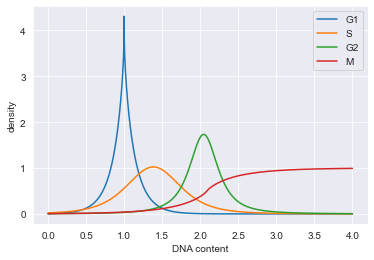

In [587]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
x = np.linspace (0, 4.0, 10000)

y_g1=stats.dweibull.pdf(x, c=0.961112,loc=1.000,scale=0.148    )

y_s=stats.t.pdf(x,df=4.01608,loc=1.384,scale=0.366)
y_g2=stats.t.pdf(x,df=1.92429,loc=2.045,scale=0.203)
y_M=stats.dweibull.cdf(x, c=0.879844,loc=2.08762, scale=0.3783)
sns.lineplot(x=x,y=y_g1,)
sns.lineplot(x=x,y=y_s,)
sns.lineplot(x=x,y=y_g2,)
sns.lineplot(x=x,y=y_M, )
plt.legend(labels=["G1","S","G2","M"])
plt.ylabel('density')
plt.xlabel('DNA content')
#display plot
plt.show()

In [16]:
df_all_phase=pd.concat([df_g1,df_s,df_g2,df_m])

In [17]:
df_all_phase

Nuclei_ID  area  max_intensity_DAPI  max_intensity_Tub  \
1              2    89             13990.0            11951.0   
2              3   173             11015.0             9362.0   
12            13   130             12472.0            14762.0   
17            18   101             16504.0            19430.0   
18            19   134             10448.0            10778.0   
...          ...   ...                 ...                ...   
30781         58   268             65535.0            65535.0   
31291        173   152             31521.0            38520.0   
31515        158   131             42200.0            45532.0   
31523        166   167             25512.0            28417.0   
31637        280   123             49096.0            46659.0   

       max_intensity_Edu  max_intensity_H3  mean_intensity_DAPI  \
1                  714.0            3358.0          9430.146067   
2                  598.0            2711.0          7380.763006   
12                 877.0            3994.0          9263.761538   
17                1000.0            4553.0         11710.495050   
18                 668.0            2944.0          6739.268657   
...                  ...               ...                  ...   
30781             1276.0           65535.0         22916.951493   
31291              974.0           65535.0         16593.684211   
31515             1066.0           65535.0         19232.015267   
31523             3536.0           65535.0         15498.520958   
31637             1002.0           65535.0         19429.276423   

       mean_intensity_Tub  mean_intensity_Edu  mean_intensity_H3  Cyto_ID  \
1             6744.179775          642.674157        3175.067416      2.0   
2             4899.092486          510.780347        2481.491329      3.0   
12            7421.869231          739.361538        3757.715385     13.0   
17           11227.871287          822.524752        4088.594059     15.0   
18            6526.671642          560.552239        2759.858209     18.0   
...                   ...                 ...                ...      ...   
30781        30560.055970          967.436567       41122.839552     60.0   
31291        18952.026316          814.177632       41586.453947    166.0   
31515        23618.793893          867.847328       50988.969466    156.0   
31523        13746.850299          938.736527       44107.766467    162.0   
31637        26887.203252          856.560976       40295.016260    262.0   

       integrated_int_DAPI  Image_ID  DNA_content  
1                 839283.0    308888     0.648548  
2                1276872.0    308888     0.986691  
12               1204289.0    308888     0.930603  
17               1182760.0    308888     0.913967  
18                903062.0    308888     0.697833  
...                    ...       ...          ...  
30781            6141743.0    308870     4.652674  
31291            2522240.0    308872     2.307554  
31515            2519394.0    308873     1.054305  
31523            2588253.0    308873     1.083121  
31637            2389801.0    308873     1.000074  

[24636 rows x 14 columns]

In [514]:
y_M

array([0.11458867, 0.83000643])

In [419]:
y

array([1.0266555 , 0.05754228])

In [420]:
a=[]
for i in range(0,len(y)):
    a.append(x[i]*y[i])

a

[2.0533110010957567, 0.17262684173509135]

In [421]:
[]rv(1.0)

SyntaxError: invalid syntax (1702672938.py, line 1)

In [557]:
df_1['Nuclei_ID'].tolist()

[2,
 3,
 5,
 9,
 11,
 13,
 21,
 23,
 24,
 25,
 27,
 30,
 36,
 41,
 43,
 52,
 70,
 76,
 83,
 88,
 96,
 97,
 98,
 100,
 102,
 103,
 108,
 113,
 115,
 118,
 119,
 120,
 122,
 123,
 124,
 128,
 134,
 135,
 136,
 143,
 146,
 157,
 170,
 174,
 177,
 179,
 181,
 184,
 191,
 193,
 194,
 196,
 199,
 202,
 203,
 208,
 209,
 211,
 212,
 214,
 216,
 217,
 221,
 222,
 223,
 224,
 234,
 237,
 238,
 240,
 243,
 247,
 248,
 249,
 251,
 258,
 261,
 262,
 265,
 272,
 282,
 283,
 285,
 292,
 300,
 305,
 309,
 311,
 320,
 323,
 326,
 339,
 348,
 354,
 356,
 357,
 358,
 362,
 364,
 370,
 373,
 375,
 383,
 386,
 387,
 389,
 393,
 394,
 395,
 396,
 408,
 410,
 411,
 412,
 413,
 415,
 416,
 421,
 433,
 434,
 437,
 438,
 440,
 14,
 16,
 20,
 24,
 29,
 31,
 34,
 38,
 39,
 43,
 44,
 45,
 51,
 57,
 59,
 62,
 66,
 73,
 76,
 79,
 83,
 84,
 90,
 92,
 97,
 98,
 103,
 107,
 109,
 111,
 117,
 121,
 126,
 129,
 130,
 132,
 133,
 135,
 138,
 141,
 147,
 150,
 151,
 162,
 163,
 172,
 175,
 176,
 177,
 179,
 183,
 186,
 19

In [556]:
pool = nn.MaxPool2d(2, stride=2, return_indices=True)
unpool = nn.MaxUnpool2d(2, stride=2)
input = torch.tensor([[[[ 1.,  2.,  3.,  4.],
                            [ 5.,  6.,  7.,  8.],
                            [ 9., 10., 11., 12.],
                            [13., 14., 15., 16.]]]])
output, indices = pool(input)
unpool(output, indices)
tensor([[[[  0.,   0.,   0.,   0.],
          [  0.,   6.,   0.,   8.],
          [  0.,   0.,   0.,   0.],
          [  0.,  14.,   0.,  16.]]]])

1        30952
2        30952
4        30952
8        30952
10       30952
         ...  
88741    30952
88755    30952
88758    30952
88770    30952
88782    30952
Name: Nuclei, Length: 25696, dtype: int64

In [ ]:
# set probability of G1 phase from DNA content of 0 to 1.01
i=0.01
for index in range(49):

    df.loc[(df['DNA_content']>i)&(df['DNA_content']<(i+0.02)),'G1']=(i+0.02)
    print(i+0.02)
    i+=0.02

In [ ]:
# set probability of G1 phase for DNA content around 1.0 (0.99 to 1.01) to 1
i=0.9
df.loc[(df['DNA_content']>i)&(df['DNA_content']<(i+0.02)),'G1']=1

In [ ]:
df['G1'].max()

In [ ]:
df['DNA_content'].max()

In [ ]:
# set probability of S phase from DNA content of 1.01 to 1.49
i=1.01
for index in range(24):

    df.loc[(df['DNA_content']>i)&(df['DNA_content']<(i+0.02)),'S']=((i+0.02-1)*2)
    print(((i+0.02-1)*2))
    i+=0.02

In [ ]:
# set probability of S phase around DNA content of 1.5(1.49 to 1.51) to 1
i=1.47
df.loc[(df['DNA_content']>i)&(df['DNA_content']<(i+0.04)),'S']=1

In [ ]:
df[['G1','S']]= df[['G1','S']].replace(np.nan, 0)

In [ ]:
df

In [ ]:
# set the probability of S phase from DNA content 0 to 0.99
df.loc[df['G1']>0,'S']=1-df[df['G1']>0]['G1']

In [ ]:
df

In [ ]:
# set the probability of G1 phase from DNA content 1.01 to 1.49
df.loc[(df['S']>0)&(df['DNA_content']>1.01),'G1']=1-df[(df['S']>0)&(df['DNA_content']>1.01)]['S']

In [ ]:
# set the probability of S phase from DNA content 1.51 to 1.99
i=1.51
for index in range(24):

    df.loc[(df['DNA_content']>i)&(df['DNA_content']<(i+0.02)),'S']=((i-0.02*(1+2*index)-1)*2)
    print(((i-0.02*(1+2*index)-1)*2))
    i+=0.02

In [ ]:
i=1.99
df.loc[(df['DNA_content']>i)&(df['DNA_content']<(i+0.02)),'G2']=1

In [ ]:
df

In [ ]:
# set the probability of G2 phase from DNA content 2 to 3.99
i=2.01
for index in range(100):

    df.loc[(df['DNA_content']>i)&(df['DNA_content']<(i+0.02)),'G2']=(i-0.02*(1+2*index))/2
    print((i-0.02*(1+2*index))/2)
    i+=0.02

In [ ]:
df.loc[(df['DNA_content']>3.99),'G2']=0.005

In [ ]:
df.loc[df['G1']>0,'DNA_content']

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df.loc[df['G2']>0,'DNA_content'])
plt.show()

In [ ]:
# set probability of M phase
df.loc[(df['mean_intensity_Edu']<1000)&(df['mean_intensity_H3']>40000)&(df['DNA_content']>2),'M']=1

In [ ]:
df['M']= df['M'].replace(np.nan, 0)

In [ ]:
df[(df['DNA_content']>1.51)&(df['S']>0.001)]

In [ ]:
#  set probability of G2 phase on  1.51 to 2.01 of DNA content
df.loc[(df['DNA_content']>1.51)&(df['S']>0.001),'G2']=1-df[(df['DNA_content']>1.51)&(df['S']>0.001)]['S']

In [ ]:
df

In [ ]:
df['G2']= df['G2'].replace(np.nan, 0)

In [ ]:
# set the probability of M phae on mean intensity more than 10000 based on the  G2 group
df.loc[(df['mean_intensity_H3']>10000)&(df['mean_intensity_Edu']<1000)&(df['M']<1)&(df['G1']==0.0)&(df['S']==0.0),'M']=1-df[(df['mean_intensity_H3']>10000)&(df['mean_intensity_Edu']<1000)&(df['M']<1)&(df['G1']==0.0)&(df['S']==0.0)]['G2']

In [ ]:
df[(df['mean_intensity_H3']>10000)&(df['mean_intensity_Edu']<1000)&(df['M']<1)&(df['G1']==0.0)&(df['S']==0.0)]

In [ ]:
# set probability of M phase on S phase of DNA content
df.loc[(df['mean_intensity_H3']>10000)&(df['mean_intensity_Edu']<1000)&(df['M']<1)&(df['G1']==0.0)&(df['S']!=0.0)&(df['G2']==0.0),'M']=1-df.loc[(df['mean_intensity_H3']>10000)&(df['mean_intensity_Edu']<1000)&(df['M']<1)&(df['G1']==0.0)&(df['S']!=0.0)&(df['G2']==0.0)]['S']

In [ ]:
df['all']=df["G1"]+df["S"]+df["G2"]+df["M"]

In [ ]:
df.loc[(df['all']!=1)]

In [ ]:
df.loc[(df['all']!=1)&(df['mean_intensity_H3']<10000)&(df['DNA_content']<1.51),'G1']=1

In [ ]:
df.loc[(df['all']!=1)&(df['mean_intensity_H3']<10000)&(df['DNA_content']>1.51)]

In [ ]:
df.loc[(df['all']!=1)&(df['mean_intensity_H3']<10000)&(df['DNA_content']>1.51)&(df['mean_intensity_Edu']>1000),"S"]=1-df.loc[(df['all']!=1)&(df['mean_intensity_H3']<10000)&(df['DNA_content']>1.51)&(df['mean_intensity_Edu']>1000)]['G2']

In [ ]:
df.loc[(df['all']!=1)&(df['mean_intensity_H3']<10000)&(df['DNA_content']>1.51)&(df['mean_intensity_Edu']<1000),"M"]=1-df.loc[(df['all']!=1)&(df['mean_intensity_H3']<10000)&(df['DNA_content']>1.51)&(df['mean_intensity_Edu']<1000)]['G2']

In [ ]:
df=df.drop('all', axis=1)


In [ ]:
df['all']=df["G1"]+df["S"]+df["G2"]+df["M"]


In [ ]:
df.loc[(df['all']!=1)&(df['M']==1),'G2']=0

In [ ]:
df.loc[(df['all']!=1),'M']=1-df.loc[(df['all']!=1)]["G2"]

In [ ]:
df.loc[(df['all']!=1)]

In [ ]:
df.loc[(df['all']!=1)&(df['mean_intensity_H3']<10000)&(df['DNA_content']>1.51)&(df['S']==0),'S']=1-df.loc[(df['all']!=1)&(df['mean_intensity_H3']<10000)&(df['DNA_content']>1.51)&(df['S']==0)]['G2']

In [ ]:
df.loc[(df['all']!=1)&(df['mean_intensity_H3']<10000)&(df['DNA_content']>1.51)&(df['G2']==0),'G2']=df.loc[(df['all']!=1)&(df['mean_intensity_H3']<10000)&(df['DNA_content']>1.51)&(df['G2']==0)]['S']

In [ ]:
df.loc[(df['all']!=1)]

In [ ]:
df[df['mean_intensity_H3']>45000]

In [ ]:
df

In [ ]:
y, x, _ = plt.hist(df['S'], bins='auto')
plt.xlim((0,5))
plt.show()

In [ ]:
i=1.49
df.loc[(df['DNA_content']>i)&(df['DNA_content']<(i+0.02)),'S']=1

In [ ]:
x

In [ ]:
df.loc[ (df['mean_intensity_Edu'] < 1000) & (df['DNA_content'] < 1.5),'lable']=0
df.loc[df['mean_intensity_Edu'] > 3000,'lable']=1
df.loc[(df['mean_intensity_Edu'] < 1000) & (df['DNA_content'] > 2)& (df['mean_intensity_H3'] <20000),'lable']=2
df.loc[(df['mean_intensity_H3'] >20000) & (df['DNA_content'] > 2) & (df['mean_intensity_Edu'] < 1000),'lable']=3


In [ ]:
df=df.dropna()

In [ ]:
df=df.drop('Nuclei_ID', axis=1)
df=df.drop('Cyto_ID', axis=1)

In [ ]:
df.to_csv('/Users/haoranyue/Documents/master_project/df_check_09_16.csv')

In [ ]:
plt.figure(figsize=(10,10))
y, x, _ = plt.hist(df['DNA_content'], bins='auto')
plt.xlim((0,5))
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.scatter(df['DNA_content'],df['mean_intensity_Edu'])
# plt.scatter(df_gn['DNA_content'],df_gn['mean_intensity_H3'])
# plt.scatter(df_112.loc[df_112['mean_intensity_H3']>20000,'DNA_content'],df_112.loc[df_112['mean_intensity_H3']>20000,'mean_intensity_Edu'])
plt.axhline(y=1000, color ="red", )
# plt.xlabel('DNA_content',fontsize=8)
# plt.ylabel('mean_intensity_EdU',fontsize=8)
# plt.axhline(y=20000, color="red",)
plt.yscale('log')

plt.axhline(y=1000, color="red",)
plt.axvline(x=1.6,c='red',ymin = 0, ymax = 0.24 )
plt.xlim((0,8))
# plt.axvline(x=2,c='red',ymin = 0, ymax = 0.24 )
plt.ylabel('Mean_intensity_EdU',fontdict={'fontsize':24})
plt.xlabel('DNA_content',fontdict={'fontsize':24})
plt.title('S phase',fontdict={'fontsize':24})
plt.show()



In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(df['DNA_content'],df['mean_intensity_Edu'])
plt.scatter(df.loc[df['mean_intensity_H3']>45000,'DNA_content'],df.loc[df['mean_intensity_H3']>45000,'mean_intensity_Edu'])
plt.yscale('log')
plt.ylabel('Mean_intensity_EdU',fontdict={'fontsize':20})
plt.xlabel('DNA_content',fontdict={'fontsize':20})
# plt.xscale('log')
# plt.axhline(y=10000, color="red",)
# plt.axhline(y=45000, color="red",)
plt.xlim((0,5))

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['mean_intensity_Edu'],df['mean_intensity_H3'])
plt.yscale('log')
plt.xscale('log')
plt.axhline(y=10000, color="red",)
plt.axhline(y=45000, color="red",)
plt.ylabel('Mean_intensity_H3',fontdict={'fontsize':24})
plt.xlabel('Mean_intensity_EdU',fontdict={'fontsize':24})

In [ ]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='ticks', font='Arial')
fig, ax = plt.subplots(figsize=(8, 8))
# Use the 'palette' argument
sns.scatterplot( x="DNA_content", y="mean_intensity_Edu", data=df,  hue='lable', legend=True,palette=['blue','green','yellow','red'], )
ax.set_yscale('log')
# Move the legend to an empty part of the plot
ax.axhline(y=950,color="red",)
ax.axhline(y=3000, color="red",)
ax.axvline(x=2,c='red',ymin = 0, ymax = 0.24 )
plt.legend(loc='lower right')
plt.xlim(0, 8)
plt.show()

In [ ]:
dfX=df.iloc[:,:-1]
dfX.iloc[1000]

In [ ]:
df.iloc[:,-1:]

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import Dataset
from PIL import Image
from natsort import natsorted
from torchvision.utils import save_image
import torchvision.transforms as transforms
import numpy as np



class CC_Dataset(Dataset):
    def __init__(self,csv_file,):
        self.annotations=pd.read_csv(csv_file),
        self.x=torch.from_numpy(self.annotations[:,:-1]),
        self.y=torch.from_numpy(df.iloc[:,-1:]),



    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):


        return self.x.iloc[index],  self.y.iloc[index]


In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset
from CCdata_regression import CC_Dataset_1
import torchvision.transforms
from CNN_model import CNN
from torch.utils.data import DataLoader
import torchvision.transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv('/Users/haoranyue/Documents/master_project/df_check_09_16.csv')
df.drop('Unnamed: 0',axis=1)

In [ ]:
df=df.drop('Unnamed: 0',axis=1)
df

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,random_state=42)

In [ ]:
logisticRegr = LogisticRegression(multi_class='multinomial')
logisticRegr.fit(X_train,y_train)

logisticRegr.score(X_train,y_train)

In [ ]:
print(logisticRegr.score(X_train,y_train))


In [6]:
import pandas as pd
df_all=pd.read_csv('/Users/haoranyue/Documents/master_project/target.csv')
df_all
# df_all_3=df_all.head(15000)
# df_all_3.to_csv('/Users/haoranyue/Documents/master_project/df_label_11_06_3.csv',index=False)

data  Label
0      309743_242.tif    2.0
1      309743_242.tif    2.0
2      310311_457.tif    0.0
3      310311_457.tif    0.0
4       309977_86.tif    1.0
...               ...    ...
29273  309916_451.tif    3.0
29274  310322_521.tif    3.0
29275  310322_521.tif    3.0
29276  310430_130.tif    3.0
29277  310430_130.tif    3.0

[29278 rows x 2 columns]

In [7]:
import skimage
all_list=[]
for i in df_all['data'].tolist():
    print(i)
    image=skimage.io.imread('/Users/haoranyue/Documents/master_project/output_17_2/'+i)
    all_list.append(image.mean())
df_all['mean_intensity']=all_list


309743_242.tif
309743_242.tif
310311_457.tif
310311_457.tif
309977_86.tif
309977_86.tif
309664_420.tif
309664_420.tif
309690_421.tif
309690_421.tif
310142_52.tif
310142_52.tif
310325_65.tif
310325_65.tif
309732_578.tif
309732_578.tif
310262_394.tif
310262_394.tif
309758_595.tif
309758_595.tif
310332_538.tif
310332_538.tif
309944_209.tif
309944_209.tif
309743_74.tif
309743_74.tif
310263_187.tif
310263_187.tif
309817_566.tif
309817_566.tif
310314_260.tif
310314_260.tif
309746_475.tif
309746_475.tif
310261_257.tif
310261_257.tif
309956_48.tif
309956_48.tif
309757_114.tif
309757_114.tif
309949_558.tif
309949_558.tif
310064_81.tif
310064_81.tif
309920_476.tif
309920_476.tif
310321_389.tif
310321_389.tif
310426_45.tif
310426_45.tif
310319_531.tif
310319_531.tif
309669_371.tif
309669_371.tif
309977_414.tif
309977_414.tif
309668_162.tif
309668_162.tif
310412_533.tif
310412_533.tif
310057_404.tif
310057_404.tif
310263_24.tif
310263_24.tif
310412_255.tif
310412_255.tif
310410_185.tif
310410_185.

In [8]:
df_all.loc[df_all['Label']==0,'target']='G1'
df_all.loc[df_all['Label']==1,'target']='S'
df_all.loc[df_all['Label']==2,'target']='G2'
df_all.loc[df_all['Label']==3,'target']='M'
df_all

data  Label  mean_intensity target
0      309743_242.tif    2.0      506.529774     G2
1      309743_242.tif    2.0      506.529774     G2
2      310311_457.tif    0.0      292.767744     G1
3      310311_457.tif    0.0      292.767744     G1
4       309977_86.tif    1.0      414.716206      S
...               ...    ...             ...    ...
29273  309916_451.tif    3.0      525.702084      M
29274  310322_521.tif    3.0      617.675933      M
29275  310322_521.tif    3.0      617.675933      M
29276  310430_130.tif    3.0      565.898066      M
29277  310430_130.tif    3.0      565.898066      M

[29278 rows x 4 columns]

In [9]:
df_all.loc[df_all['Label']==3]

data  Label  mean_intensity target
90     310326_108.tif    3.0      564.980367      M
91     310326_108.tif    3.0      564.980367      M
274    309817_572.tif    3.0      516.729444      M
275    309817_572.tif    3.0      516.729444      M
300    309957_484.tif    3.0      513.689004      M
...               ...    ...             ...    ...
29273  309916_451.tif    3.0      525.702084      M
29274  310322_521.tif    3.0      617.675933      M
29275  310322_521.tif    3.0      617.675933      M
29276  310430_130.tif    3.0      565.898066      M
29277  310430_130.tif    3.0      565.898066      M

[1680 rows x 4 columns]

(0.0, 1000.0)

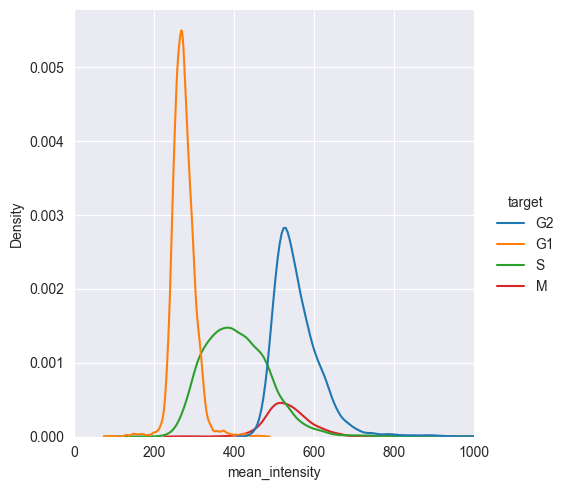

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df_all, x="mean_intensity", hue="target",kind='kde')
plt.xlim((0,1000))

In [14]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

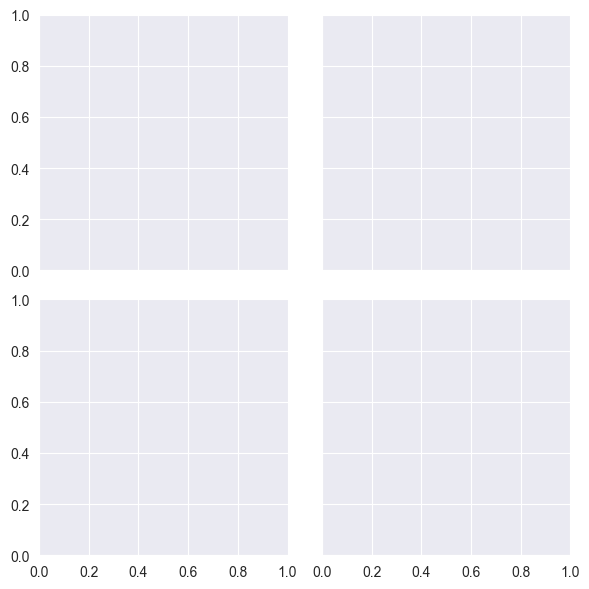

In [15]:
sns.FacetGrid(tips, col="time", row="sex")


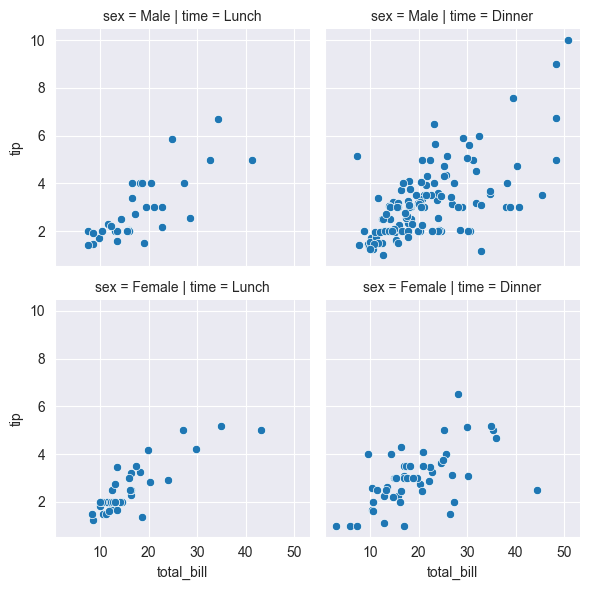

In [17]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")


In [179]:
import skimage
from skimage import measure
import pandas as pd
df_all=pd.read_csv('/Users/haoranyue/Documents/master_project/df_label_11_09_02.csv')
df_all['data'].tolist()


['309147_49.tif',
 '309533_112.tif',
 '308994_34.tif',
 '309386_279.tif',
 '309148_169.tif',
 '309338_239.tif',
 '309614_109.tif',
 '308801_188.tif',
 '309530_36.tif',
 '308803_258.tif',
 '309063_249.tif',
 '309014_287.tif',
 '309292_206.tif',
 '309061_199.tif',
 '309016_157.tif',
 '308798_206.tif',
 '309346_182.tif',
 '309231_265.tif',
 '309208_80.tif',
 '309480_87.tif',
 '309112_60.tif',
 '309084_16.tif',
 '308792_74.tif',
 '309341_303.tif',
 '309424_57.tif',
 '309288_1.tif',
 '309235_127.tif',
 '309476_77.tif',
 '309253_84.tif',
 '309383_328.tif',
 '309106_15.tif',
 '308795_231.tif',
 '309613_388.tif',
 '309006_157.tif',
 '309476_63.tif',
 '309611_54.tif',
 '308993_29.tif',
 '309015_69.tif',
 '309140_54.tif',
 '309124_102.tif',
 '309249_158.tif',
 '308792_60.tif',
 '309112_74.tif',
 '308838_251.tif',
 '308989_71.tif',
 '309474_259.tif',
 '309066_87.tif',
 '309130_254.tif',
 '309008_38.tif',
 '309527_250.tif',
 '309530_22.tif',
 '309017_350.tif',
 '309292_212.tif',
 '309014_293.tif',

In [78]:
import os
os.makedirs('/Users/haoranyue/Documents/master_project/output_17_3/')

FileExistsError: [Errno 17] File exists: '/Users/haoranyue/Documents/master_project/output_17_3/'

In [180]:

import glob
import shutil
import os

src_dir='/Users/haoranyue/Documents/master_project/output_17/'
dst_dir='/Users/haoranyue/Documents/master_project/output_17_2'
for i in df_all['data'].tolist():
    image=os.path.join(src_dir, i)
    print(image)
    shutil.copy(image, dst_dir)




/Users/haoranyue/Documents/master_project/output_17/309147_49.tif
/Users/haoranyue/Documents/master_project/output_17/309533_112.tif
/Users/haoranyue/Documents/master_project/output_17/308994_34.tif
/Users/haoranyue/Documents/master_project/output_17/309386_279.tif
/Users/haoranyue/Documents/master_project/output_17/309148_169.tif
/Users/haoranyue/Documents/master_project/output_17/309338_239.tif
/Users/haoranyue/Documents/master_project/output_17/309614_109.tif
/Users/haoranyue/Documents/master_project/output_17/308801_188.tif
/Users/haoranyue/Documents/master_project/output_17/309530_36.tif
/Users/haoranyue/Documents/master_project/output_17/308803_258.tif
/Users/haoranyue/Documents/master_project/output_17/309063_249.tif
/Users/haoranyue/Documents/master_project/output_17/309014_287.tif
/Users/haoranyue/Documents/master_project/output_17/309292_206.tif
/Users/haoranyue/Documents/master_project/output_17/309061_199.tif
/Users/haoranyue/Documents/master_project/output_17/309016_157.ti

In [181]:
len(os.listdir('/Users/haoranyue/Documents/master_project/output_17_3'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/haoranyue/Documents/master_project/output_17_3'

In [182]:
import skimage
import cv2
import numpy as np
from skimage import measure
dst_dir='/Users/haoranyue/Documents/master_project/output_17_2'
width=16
for index in df_all['data'].tolist():
    print(index)

    image=os.path.join(dst_dir, index)
    image_1=(skimage.io.imread(image)).astype(int)
    region=measure.regionprops(image_1)[0]
    centroid=region.centroid




    i = centroid[0]

    j = centroid[1]

    imin = int(round(max(0, i-width)))
    imax = int(round(min(image_1.shape[0], i+width)))
    jmin = int(round(max(0, j-width)))
    jmax = int(round(min(image_1.shape[0], j+width)))

    box_mask_1=image_1[imin:imax, jmin:jmax]

    if box_mask_1.shape[0]==box_mask_1.shape[1]:

        cv2.imwrite('/Users/haoranyue/Documents/master_project/output_17_3/'+index,box_mask_1)


309147_49.tif
309533_112.tif
308994_34.tif
309386_279.tif
309148_169.tif
309338_239.tif
309614_109.tif
308801_188.tif
309530_36.tif
308803_258.tif
309063_249.tif
309014_287.tif
309292_206.tif
309061_199.tif
309016_157.tif
308798_206.tif
309346_182.tif
309231_265.tif
309208_80.tif
309480_87.tif
309112_60.tif
309084_16.tif
308792_74.tif
309341_303.tif
309424_57.tif
309288_1.tif
309235_127.tif
309476_77.tif
309253_84.tif
309383_328.tif
309106_15.tif
308795_231.tif
309613_388.tif
309006_157.tif
309476_63.tif
309611_54.tif
308993_29.tif
309015_69.tif
309140_54.tif
309124_102.tif
309249_158.tif
308792_60.tif
309112_74.tif
308838_251.tif
308989_71.tif
309474_259.tif
309066_87.tif
309130_254.tif
309008_38.tif
309527_250.tif
309530_22.tif
309017_350.tif
309292_212.tif
309014_293.tif
309016_143.tif
309129_135.tif
309346_196.tif
308798_212.tif
309141_208.tif
309231_271.tif
309344_246.tif
308795_69.tif
309208_94.tif
309012_60.tif
308994_20.tif
309533_106.tif
309284_294.tif
309526_7.tif
309238_104.

In [183]:
df_1=pd.read_csv('/Users/haoranyue/Documents/master_project/df_label_11_06_2.csv')
df_2=pd.read_csv('/Users/haoranyue/Documents/master_project/df_label_11_09_02.csv')
df_3=pd.concat([df_1,df_2])
df_3


data  Label
0      310311_457.tif    0.0
1      309664_420.tif    0.0
2      309665_633.tif    0.0
3      309758_595.tif    0.0
4      310332_538.tif    0.0
...               ...    ...
33625   309147_50.tif    1.0
33626  309386_260.tif    0.0
33627  309207_256.tif    1.0
33628  309284_299.tif    0.0
33629  309286_149.tif    1.0

[49522 rows x 2 columns]

In [184]:
import os

list_dir = os.listdir('/Users/haoranyue/Documents/master_project/output_17_3')
df_file = pd.DataFrame(list_dir, columns=['data'])

result = pd.merge(df_file, df_3, on="data", how='inner')
result

data  Label
0       309147_49.tif    3.0
1      309533_112.tif    0.0
2       308994_34.tif    1.0
3      309386_279.tif    2.0
4      309148_169.tif    1.0
...               ...    ...
30604  309609_133.tif    1.0
30605  308840_175.tif    0.0
30606   309147_50.tif    1.0
30607  309386_260.tif    0.0
30608  309286_149.tif    1.0

[30609 rows x 2 columns]

In [ ]:
result

In [190]:
df_1=result[result['Label']==0]
df_2=result[result['Label']==1]
df_3=result[result['Label']==2]
df_4=result[result['Label']==3]
df_4

data  Label
0       309147_49.tif    3.0
61      309206_91.tif    3.0
272    309129_337.tif    3.0
645     309252_13.tif    3.0
905     309256_77.tif    3.0
...               ...    ...
29352   309207_22.tif    3.0
29638  308792_137.tif    3.0
29859   309473_62.tif    3.0
29968   308838_72.tif    3.0
30006  309012_152.tif    3.0

[234 rows x 2 columns]

In [186]:
df_1.head(1680)
df_1680=pd.concat([df_1.head(1680),df_2.head(1680),df_3.head(1680),df_4])
df_1680.to_csv('/Users/haoranyue/Documents/master_project/target_1680.csv',index=False)

In [ ]:
df_1680[]

In [132]:
result.to_csv('/Users/haoranyue/Documents/master_project/target.csv',index=False)
